# Title : "Analisis Teks Cyberbullying Pada Twitter Menggunakan Metode Analisis Data Eksploratif"

## By : <font color='red'>Tim BDC24</font>

## <font color='blue'>Daftar :</font>
### <font color='blue'>A. Library Used</font>
### <font color='blue'>B. Understanding & Importing Data</font>
### <font color='blue'>C. Lihat perbandingan jumlah kata cyberbullying berdasarkan kategori</font>
### <font color='blue'>D. Membandingkan jumlah antara kata cyberbullying dan tidak untuk setiap kategori cyberbullying</font>
### <font color='blue'>E. Melihat apakah terdapat hubungan kata yang merujuk ke cyberbullying khusus kategori individual dan group</font>
### <font color='blue'>F. Preprocessing Text and Visual Representation</font>
### <font color='blue'>G. Visualisasi Data Text Keseluruhan Tweet Dari Seluruh Kategori Cyberbullying</font>
### <font color='blue'>H. Visualisasi Data Text Tweet Berdasarkan Masing-Masing Kategori Cyberbullying</font>
### <font color='blue'>I. Keterkaitan Hubungan Antar Kategori Cyberbullying Beserta Visualisasi Text</font>
### <font color='blue'>J. Hasil dan Analisis</font>
### <font color='blue'>K. Kesimpulan</font>

Masalah yang akan dibahas :
* Menampilkan kata terbanyak yang muncul dan merujuk ke cyberbullying pada setiap kategori cyberbullying seperti individual, group, gender, physical, race, religion
* Menampilkan keterkaitan kata cyberbullying yang merujuk pada 3 jenis cyberbullying, serta menampilkan banyaknya kata tersebut muncul
* Analisis dari hasil setiap kategori cyberbullying 

## <font color='darkred'>A. Library Used</font>

In [1]:
# Importing Package used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## <font color='darkred'>B. Understanding & Importing Data</font>

Variabel dalam data dijelaskan sebagai berikut :
* Bully : tweet tersebut termasuk masuk ke cyberbullying atau tidak (yes or no)
* Tweet : isi dari tweet
* Individual : tweet tersebut adalah cyberbullying yang ditunjukkan untuk individual (0=
tidak,1= iya)
* Group : tweet tersebut adalah cyberbullying yang ditunjukkan untuk kelompok orang (0=
tidak
, 1= iya)
* Gender : tweet tersebut adalah cyberbullying yang berdasarkan gender atau mengutuk
sesorang menggunakan kata-kata yang berhubungan dengan gender (0= tidak , 1= iya)
* Physical : tweet tersebut adalah cyberbullying yang berdasarkan kepada perbedaan
bentukfisik atau disabilitas (0= tidak , 1= iya)
* Race : tweet tersebut adalah cyberbullying yang berdasarkan etnis (0= tidak , 1= iya)
* Religion : tweet tersebut adalah cyberbullying yang berdasarkan agama, organisasi
agama,atau keyakinan tertentu (0= tidak , 1= iya)

In [2]:
# Load the dataset
df = pd.read_csv('FILE_LATIHAN/Data (1).csv')

In [3]:
# Show dataset
df

bully                                              tweet  individual  \
0        no  USER terimakasih Ustadz sudah bersuara tentang...           0   
1        no  USER USER Maaf sebenarnya twiter pertama kali ...           0   
2       yes  USER Anjing tai goblok idiot bangsat monyet ba...           1   
3        no  Hadiri Lokakarya Kebudayaan Daerah, Bupati Rup...           0   
4       yes      USER USER USER yg kaya gini layak di tangkap.           1   
...     ...                                                ...         ...   
10530   yes  USER USER USER kyak dah lahir aja ngomong soeh...           0   
10531   yes  USER USER USER USER USER Pencitraan Lu...ah......           1   
10532   yes  USER USER USER USER USER cebong doang yg tukan...           0   
10533   yes  USER BIASA LAH PROF KAUM KAMBING BENGEK YA BEG...           0   
10534    no  Bila nak kawin ni kena simpan duit,ilmu agama ...           0   

       group  gender  physical  race  religion  
0          0       0         0     0         0  
1          0       0         0     0         0  
2          0       1         1     0         0  
3          0       0         0     0         0  
4          0       0         0     0         0  
...      ...     ...       ...   ...       ...  
10530      1       0         0     0         0  
10531      0       0         0     0         0  
10532      1       0         0     0         0  
10533      1       0         0     0         0  
10534      0       0         0     0         0  

[10535 rows x 8 columns]

In [4]:
# Show info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10535 entries, 0 to 10534
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bully       10535 non-null  object
 1   tweet       10535 non-null  object
 2   individual  10535 non-null  int64 
 3   group       10535 non-null  int64 
 4   gender      10535 non-null  int64 
 5   physical    10535 non-null  int64 
 6   race        10535 non-null  int64 
 7   religion    10535 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 658.6+ KB


## <font color='darkred'>C. Lihat perbandingan jumlah kata cyberbullying berdasarkan kategori</font>

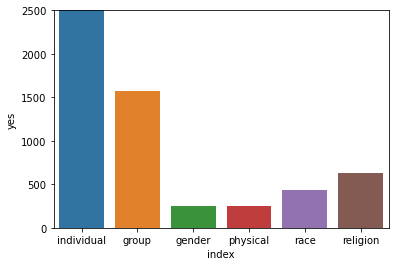

In [5]:
# Menampilkan banyaknya kata cyberbullying (1 == yes) berdasarkan masing-masing kategori
s = df.groupby(['bully']).sum().loc['yes'].reset_index()
sns.barplot(x='index', y='yes', data=s, ci=None)
plt.ylim(ymin=0, ymax=2500)
plt.show()

## <font color='darkred'>D. Membandingkan jumlah antara kata cyberbullying dan tidak untuk setiap kategori cyberbullying</font>

### <font color='tomato'>1. Individual Cyberbullying</font>

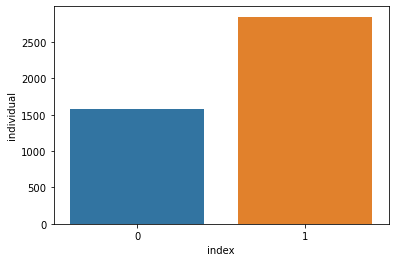

In [6]:
buli = df[df['bully']=='yes']
individual = buli['individual'].value_counts().reset_index()
sns.barplot(x='index', y='individual', data=individual)
plt.show()

In [7]:
# Menampilkan jumlah masing-masing (0 == no, 1 == yes) dari kategori individual cyberbullying dalam bentuk dataframe
buli['individual'].value_counts().reset_index()

index  individual
0      1        2848
1      0        1573

Pada kategori individual cyberbullying terdapat banyak kata yang merujuk kearah cyberbullying dibandingkan dengan kata positif (non-cyberbullying)

### <font color='tomato'>2. Group Cyberbullying</font>

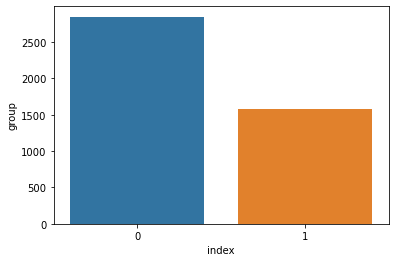

In [8]:
buli = df[df['bully']=='yes']
group = buli['group'].value_counts().reset_index()
sns.barplot(x='index', y='group', data=group)
plt.show()

In [9]:
# Menampilkan jumlah masing-masing (0 == no, 1 == yes) dari kategori group cyberbullying dalam bentuk dataframe
buli['group'].value_counts().reset_index()

index  group
0      0   2848
1      1   1573

Pada kategori group cyberbullying terdapat banyak kata yang merujuk kearah non-cyberbullying dibandingkan dengan kata cyberbullying, akan tetapi tidak berlaku jika ada keterkaitan dengan kategori cyberbullying lainnya pada pembahasan selanjutnya

### <font color='tomato'>3. Gender Cyberbullying</font>

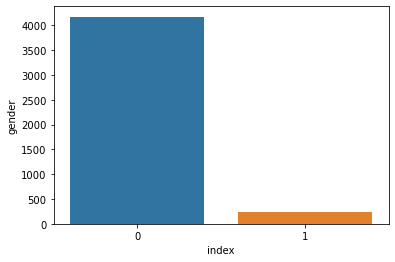

In [10]:
buli = df[df['bully']=='yes']
gender = buli['gender'].value_counts().reset_index()
sns.barplot(x='index', y='gender', data=gender)
plt.show()

In [11]:
# Menampilkan jumlah masing-masing (0 == no, 1 == yes) dari kategori gender cyberbullying dalam bentuk dataframe
buli['gender'].value_counts().reset_index()

index  gender
0      0    4176
1      1     245

Pada kategori gender cyberbullying terdapat banyak kata yang merujuk kearah non-cyberbullying dibandingkan dengan kata cyberbullying, akan tetapi tidak berlaku jika ada keterkaitan dengan kategori cyberbullying lainnya pada pembahasan selanjutnya

### <font color='tomato'>4. Physical Cyberbullying</font>

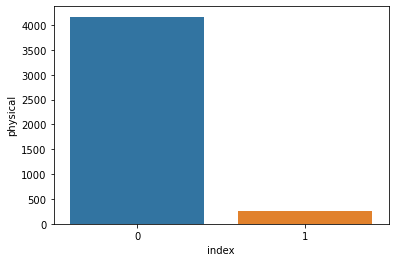

In [12]:
buli = df[df['bully']=='yes']
physical = buli['physical'].value_counts().reset_index()
sns.barplot(x='index', y='physical', data=physical)
plt.show()

In [13]:
# Menampilkan jumlah masing-masing (0 == no, 1 == yes) dari kategori physical cyberbullying dalam bentuk dataframe
buli['physical'].value_counts().reset_index()

index  physical
0      0      4166
1      1       255

Pada kategori physical cyberbullying terdapat banyak kata yang merujuk kearah non-cyberbullying dibandingkan dengan kata cyberbullying, akan tetapi tidak berlaku jika ada keterkaitan dengan kategori cyberbullying lainnya pada pembahasan selanjutnya

### <font color='tomato'>5. Race Cyberbullying</font>

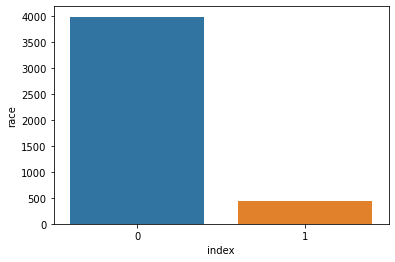

In [14]:
buli = df[df['bully']=='yes']
race = buli['race'].value_counts().reset_index()
sns.barplot(x='index', y='race', data=race)
plt.show()

In [15]:
# Menampilkan jumlah masing-masing (0 == no, 1 == yes) dari kategori race cyberbullying dalam bentuk dataframe
buli['race'].value_counts().reset_index()

index  race
0      0  3988
1      1   433

Pada kategori race cyberbullying terdapat banyak kata yang merujuk kearah non-cyberbullying dibandingkan dengan kata cyberbullying, akan tetapi tidak berlaku jika ada keterkaitan dengan kategori cyberbullying lainnya pada pembahasan selanjutnya

### <font color='tomato'>6. Religion Cyberbullying</font>

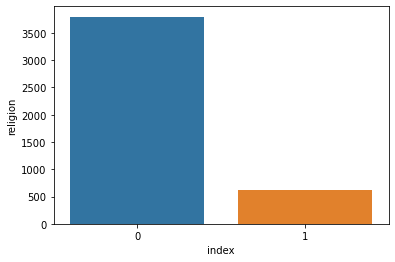

In [16]:
buli = df[df['bully']=='yes']
religion = buli['religion'].value_counts().reset_index()
sns.barplot(x='index', y='religion', data=religion)
plt.show()

In [17]:
# Menampilkan jumlah masing-masing (0 == no, 1 == yes) dari kategori religion cyberbullying dalam bentuk dataframe
buli['religion'].value_counts().reset_index()

index  religion
0      0      3795
1      1       626

Pada kategori religion cyberbullying terdapat banyak kata yang merujuk kearah non-cyberbullying dibandingkan dengan kata cyberbullying, akan tetapi tidak berlaku jika ada keterkaitan dengan kategori cyberbullying lainnya pada pembahasan selanjutnya

## <font color='darkred'>E. Melihat apakah terdapat hubungan kata yang merujuk ke cyberbullying khusus kategori individual dan group</font>

In [18]:
# Menampilkan hubungan group dan individual berdasarkan seluruh tweet
ig = df.groupby(['group', 'individual'])['tweet'].sum().reset_index()
ig

group  individual                                              tweet
0      0           0  USER terimakasih Ustadz sudah bersuara tentang...
1      0           1  USER Anjing tai goblok idiot bangsat monyet ba...
2      1           0  Smartfren jaringan nya kok brengsek ya ...'USE...

In [19]:
# Menampilkan hubungan group dan individual berdasarkan kolom bully dan total dari masing-masing hubungan
ig = df.groupby(['group', 'individual'])['bully'].count().reset_index()
ig

group  individual  bully
0      0           0   6114
1      0           1   2848
2      1           0   1573

In [20]:
# Tidak ditemukan kalimat yang menunjukkan bully dari kategori group cyberbullying sekaligus kategori individual cyberbullying
gg = df[(df['group']==1) & (df['individual']==1)]
gg

Empty DataFrame
Columns: [bully, tweet, individual, group, gender, physical, race, religion]
Index: []

## <font color='darkred'>F. Preprocessing Text and Visual Representation</font>

Langkah selanjutnya yakni membersihkan text tweet terlebih dahulu yang nantinya akan disaring beberapa kata, khususnya yang menunjukkan kata cyberbullying. Pembersihan yang dilakukan seperti menghilangkan kata yang tidak begitu penting seperti kata hubung, komentar singkat dan merubah semua kata yang berawal huruf kapital menjadi dalam bentuk huruf kecil.

In [21]:
# Membuat fungsi untuk membersihkan tweet
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text
    
def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

In [22]:
def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

# def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     text = [stemmer.stem(word) for word in text]
#     return text

Pada fungsi yang ditutup dalam bentuk komentar seperti stemmingText tersebut tidak kami digunakan. Dikarenakan terdapat kendala saat kami melakukan stemming yakni memakan waktu yang cukup lama dalam prosesnya. 

### Membuat kolom baru dengan nama text_clean untuk tweet yang telah dibersihkan dan diubah menjadi huruf kecil semua

In [23]:
df['text_clean'] = df['tweet'].apply(cleaningText)
df['text_clean'] = df['text_clean'].apply(casefoldingText)
df.head()

bully                                              tweet  individual  group  \
0    no  USER terimakasih Ustadz sudah bersuara tentang...           0      0   
1    no  USER USER Maaf sebenarnya twiter pertama kali ...           0      0   
2   yes  USER Anjing tai goblok idiot bangsat monyet ba...           1      0   
3    no  Hadiri Lokakarya Kebudayaan Daerah, Bupati Rup...           0      0   
4   yes      USER USER USER yg kaya gini layak di tangkap.           1      0   

   gender  physical  race  religion  \
0       0         0     0         0   
1       0         0     0         0   
2       1         1     0         0   
3       0         0     0         0   
4       0         0     0         0   

                                          text_clean  
0  user terimakasih ustadz sudah bersuara tentang...  
1  user user maaf sebenarnya twiter pertama kali ...  
2  user anjing tai goblok idiot bangsat monyet ba...  
3  hadiri lokakarya kebudayaan daerah bupati rupi...  
4       user user user yg kaya gini layak di tangkap

### Selanjutnya, disini kami menggunakan stopwords sendiri untuk menghapus beberapa kata yang tidak begitu penting dengan memberikan variabel dengan nama stopwords.

In [24]:
stopword=['gue','gw','user','gak','gk','yang','yg','lu','ya','si','jd','jadi','apa','ap','ama','iya','lbh',
         'jd','kalo','klo','tdk','tidak','nya','ny','tuh','sih','sdh','udah','udh','langsung','mah','bang',
         'url','loe','lo','deh','dh','tp','tapi','emg','emang','ah','aja','aj','ke','dah','eh','gimana',
         'jg','juga','jgn','g','ga','nih','ni','tu', 'banget','bgt','gk','harus','hrs','biar','gini','ttp',
         'dr','dari','dri','ente','tentang','ttg','sudah','di', 'amp','semua','kalau','tau','lg','karna',
         'mau','masih','msh','cuma','cm','sj','saja','dengan','dgn','dlu','dulu','dl','sok','karena','luh',
         'kan','it','itu','buat','tak','oleh','km','kamu','kmu','kali','kayak','bikin','bkn','loh','bener',
         'trus','terus','gua','dasar','kau','orang','liat','lihat','masuk','org','ulang','wkwkwk','gmnin',
         'dapat','dpt','pd','pada','x','isi','itu','it','kek','spt','suka','mending','jan','hauahahaha','o',
         'wes','sisan','gih','woy','woii','aje','rp','klw','mudah','ngapain','kek','skrg','sby','lbh','mrk',
         'ngak','bang','habishabisan','hp','sgala','segala','pake','pke','ttp','hti','elo','ta','wk','cari',
         'udik','haha','sampe','kl','ma','dsna','stlh','setelah','ajk','ajak']

### Membuat kolom baru dengan nama text_clean2 untuk menampilkan tweet yang telah dibersihkan dengan menghilangkan kata dari variabel stopword

In [25]:
def clean_key(text):
    text=' '.join(word for word in text.split() if word not in stopword)
    return text
df['text_clean2'] = df['text_clean'].apply(clean_key)
df.head()

bully                                              tweet  individual  group  \
0    no  USER terimakasih Ustadz sudah bersuara tentang...           0      0   
1    no  USER USER Maaf sebenarnya twiter pertama kali ...           0      0   
2   yes  USER Anjing tai goblok idiot bangsat monyet ba...           1      0   
3    no  Hadiri Lokakarya Kebudayaan Daerah, Bupati Rup...           0      0   
4   yes      USER USER USER yg kaya gini layak di tangkap.           1      0   

   gender  physical  race  religion  \
0       0         0     0         0   
1       0         0     0         0   
2       1         1     0         0   
3       0         0     0         0   
4       0         0     0         0   

                                          text_clean  \
0  user terimakasih ustadz sudah bersuara tentang...   
1  user user maaf sebenarnya twiter pertama kali ...   
2  user anjing tai goblok idiot bangsat monyet ba...   
3  hadiri lokakarya kebudayaan daerah bupati rupi...   
4       user user user yg kaya gini layak di tangkap   

                                         text_clean2  
0  terimakasih ustadz bersuara radikal radikal in...  
1    maaf sebenarnya twiter pertama dbuat bukan bego  
2  anjing tai goblok idiot bangsat monyet babi fu...  
3  hadiri lokakarya kebudayaan daerah bupati rupi...  
4                                 kaya layak tangkap

### Membuat kolom baru dengan nama text_prepocessed untuk memisahkan kalimat menjadi per-kata 

In [26]:
df['text_preprocessed'] = df['text_clean2'].apply(tokenizingText)
df['text_preprocessed'] = df['text_preprocessed'].apply(filteringText)

df.drop_duplicates(subset='text_clean2', inplace=True)
df.head()

bully                                              tweet  individual  group  \
0    no  USER terimakasih Ustadz sudah bersuara tentang...           0      0   
1    no  USER USER Maaf sebenarnya twiter pertama kali ...           0      0   
2   yes  USER Anjing tai goblok idiot bangsat monyet ba...           1      0   
3    no  Hadiri Lokakarya Kebudayaan Daerah, Bupati Rup...           0      0   
4   yes      USER USER USER yg kaya gini layak di tangkap.           1      0   

   gender  physical  race  religion  \
0       0         0     0         0   
1       0         0     0         0   
2       1         1     0         0   
3       0         0     0         0   
4       0         0     0         0   

                                          text_clean  \
0  user terimakasih ustadz sudah bersuara tentang...   
1  user user maaf sebenarnya twiter pertama kali ...   
2  user anjing tai goblok idiot bangsat monyet ba...   
3  hadiri lokakarya kebudayaan daerah bupati rupi...   
4       user user user yg kaya gini layak di tangkap   

                                         text_clean2  \
0  terimakasih ustadz bersuara radikal radikal in...   
1    maaf sebenarnya twiter pertama dbuat bukan bego   
2  anjing tai goblok idiot bangsat monyet babi fu...   
3  hadiri lokakarya kebudayaan daerah bupati rupi...   
4                                 kaya layak tangkap   

                                   text_preprocessed  
0  [terimakasih, ustadz, bersuara, radikal, radik...  
1                        [maaf, twiter, dbuat, bego]  
2  [anjing, tai, goblok, idiot, bangsat, monyet, ...  
3  [hadiri, lokakarya, kebudayaan, daerah, bupati...  
4                             [kaya, layak, tangkap]

## <font color='darkred'>G. Visualisasi Data Text Keseluruhan Tweet Dari Seluruh Kategori Cyberbullying</font>

Membuat sebuah list kosong dengan mendeklarasikan kedalam bentuk string dan variabel diberi nama list_all (mencakup semua tweet dari seluruh kategori bullying) dan menampilkan kumpulan tweet dari kolom text_preprocessed

In [27]:
list_all = ''
for i in df['text_preprocessed']:
    for j in i :
        list_all += ' '+(j)

In [28]:
list_all

' terimakasih ustadz bersuara radikal radikal pikiran rejim mesjid radikalkampus radikaldosen radikalpadahal pijakan peradaban memangnya menghancurkan indonesia maaf twiter dbuat bego anjing tai goblok idiot bangsat monyet babi fucc kont ngents goblok kasar maaf hadiri lokakarya kebudayaan daerah bupati rupinus masyarakat sekadau rawat manfaatkan objek� budaya kaya layak tangkap namanya memancing konflik horizontal polisi membiarkan lengserkan jokowi indonesia hancur wonu oppa matanya sipit smartfren jaringan brengsek pret kampret dukung ganti presiden tppresidenmu sapa rocky gerung kapir thaa ahelah sombong punuk onta jancuk kw zonk bawaslu kolaka tertinggi pelanggaran asn pilkada pilkada untungan ngaku komunis ngaku atheis cebong kebanyakan makan tahi jokowi sadar jokowi mengumumkan indonesia dirubah indochina butuh cowo kontol gede bs angetin dimusim ujan horny ahh hawanya pngen ngentot say retweet nger partai koalisi pendukung pemerintah menjalin kerjasama politik partai komunis ch

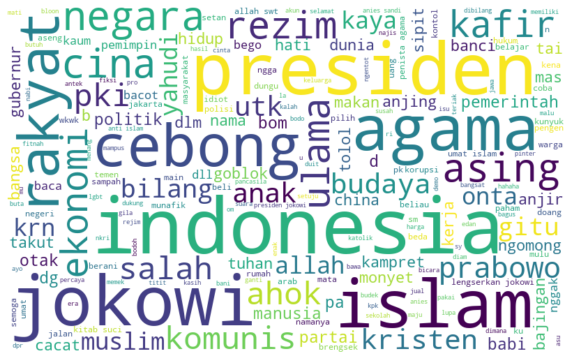

In [29]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_all)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

### Menampilkan 10 kata teratas yang paling banyak dari seluruh tweet yang muncul dalam bentuk barplot

<AxesSubplot:ylabel='0'>

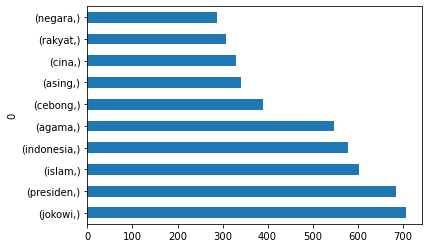

In [30]:
list_all= []
for i in df['text_preprocessed']:
    for j in i:
        list_all.append(j)
list_all = pd.DataFrame(list_all)
list_all.value_counts().nlargest(10).plot(kind='barh')

In [31]:
print('Berikut total dari 10 kata teratas dari seluruh cyberbullying')
list_all.value_counts().nlargest(10)

Berikut total dari 10 kata teratas dari seluruh cyberbullying


jokowi       708
presiden     686
islam        602
indonesia    578
agama        548
cebong       390
asing        341
cina         329
rakyat       307
negara       287
dtype: int64

## <font color='darkred'>H. Visualisasi Data Text Tweet Berdasarkan Masing-Masing Kategori Cyberbullying</font>

### <font color='orange'>1. Visualisasi Data Text Tweet Berdasarkan Kategori Individual Cyberbullying</font>

Membuat sebuah list kosong dengan mendeklarasikan kedalam bentuk string dan variabel diberi nama list_individual dan menampilkan kumpulan tweet dari kolom text_preprocessed

In [32]:
list_individual = ''
for i in df['text_preprocessed'][df['individual']==1]:
    for j in i :
        list_individual += ' '+(j)

In [33]:
list_individual

' anjing tai goblok idiot bangsat monyet babi fucc kont ngents goblok kasar maaf kaya layak tangkap namanya memancing konflik horizontal polisi membiarkan lengserkan jokowi indonesia hancur pret kampret dukung ganti presiden tppresidenmu sapa rocky gerung kapir thaa ahelah sombong punuk onta lipstick sapu tangan bora diriku hati mampus malu makan cipokan komunis de elegan sampean undang penulis istana ngundang busar buser kaesuwon rak temen temen pinter bloon bego begoin mempan mabuk pil pcc bego namanya internet hadeh goblog jokowi diktator muka ndeso hehehe kader fitnah jokowi sbg antek komunis contoh mainkan isu pki amin lengserkan jokowi ribet rakyat aksijokowitakutlengser kabor nak specific task campur bajingan goblok anjing asma dewi tercyduk alumni pendukung anies sandi loyalis prabowo situ ngerti uu kriminal anak anak menghina presiden dibawah umur thkok penjara anak cina ngancam bunuh presiden ngga apainlucu super tololwaras ngga otak usir cina ki gila pamungkas dibui garagara

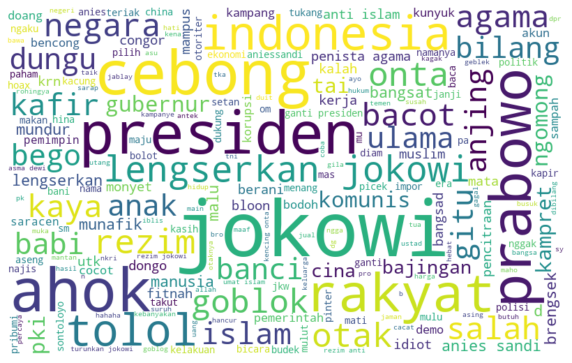

In [34]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_individual)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

### Menampilkan 10 kata teratas yang paling banyak muncul dari tweet yang menunjukkan individual cyberbullying dalam bentuk barplot

<AxesSubplot:ylabel='0'>

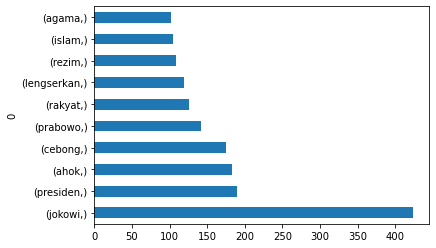

In [35]:
list_individual= []
for i in df['text_preprocessed'][df['individual']==1]:
    for j in i:
        list_individual.append(j)
list_individual = pd.DataFrame(list_individual)
list_individual.value_counts().nlargest(10).plot(kind='barh')

In [36]:
print('Berikut total dari 10 kata teratas dari individual cyberbullying')
list_individual.value_counts().nlargest(10)

Berikut total dari 10 kata teratas dari individual cyberbullying


jokowi        424
presiden      190
ahok          183
cebong        175
prabowo       142
rakyat        126
lengserkan    119
rezim         108
islam         104
agama         102
dtype: int64

### <font color='orange'>2. Visualisasi Data Text Tweet Berdasarkan Kategori Group Cyberbullying </font>

Membuat sebuah list kosong dengan mendeklarasikan kedalam bentuk string dan variabel diberi nama list_group dan menampilkan kumpulan tweet dari kolom text_preprocessed

In [37]:
list_group = ''
for i in df['text_preprocessed'][df['group']==1]:
    for j in i :
        list_group += ' '+(j)

In [38]:
list_group

' smartfren jaringan brengsek cebong kebanyakan makan tahi jokowi sadar jokowi mengumumkan indonesia dirubah indochina partai koalisi pendukung pemerintah menjalin kerjasama politik partai komunis china iyarejim kunyuk berani lawan lengserkan jok lawan politiknya wowo ht ts pksbiasa bayarin demodemofpijgn takut jokrakyat tni pol bela jokahok rakyat cina rakyat indonesia anak keturunan pki paham cebong buta tuli kenyataan menimpa negeri membela rezim gampang didoktrin pidato data indehoi pemerintah linimasa panas ganyang pki bani pekok binasanya lempar laut teman ahok emank tai pemimpinnya babi mengkritik mengkritik terbiasa reaktif nama agama memilih diam pernyataannya diamnya bukti pembajak agama organisasi paham terlarang bumi pancasila bubarkan ulah cebong kafir keparat kerjaan cornelis tionghoa stress gila intinya prabowo amin berprasangka berdasar krn menjegal pdip berkuasa kegaduan adu domba komporin ciribkhas modus penjajah kacung waspada komunis ekonomi wilyah nkri relah jajah 

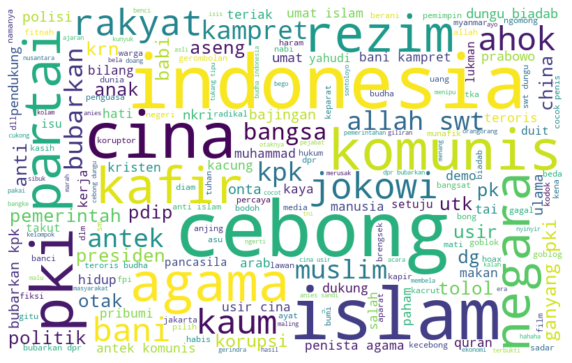

In [39]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_group)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

### Menampilkan 10 kata teratas yang paling banyak muncul dari tweet yang menunjukkan group cyberbullying dalam bentuk barplot

<AxesSubplot:ylabel='0'>

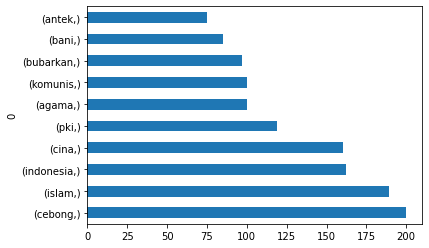

In [40]:
list_group= []
for i in df['text_preprocessed'][df['group']==1]:
    for j in i:
        list_group.append(j)
list_group = pd.DataFrame(list_group)
list_group.value_counts().nlargest(10).plot(kind='barh')

In [41]:
print('Berikut total dari 10 kata teratas dari group cyberbullying')
list_group.value_counts().nlargest(10)

Berikut total dari 10 kata teratas dari group cyberbullying


cebong       200
islam        189
indonesia    162
cina         160
pki          119
agama        100
komunis      100
bubarkan      97
bani          85
antek         75
dtype: int64

### <font color='orange'>3. Visualisasi Data Text Tweet Berdasarkan Kategori Gender Cyberbullying </font>

Membuat sebuah list kosong dengan mendeklarasikan kedalam bentuk string dan variabel diberi nama list_gender dan menampilkan kumpulan tweet dari kolom text_preprocessed

In [42]:
list_gender = ''
for i in df['text_preprocessed'][df['gender']==1]:
    for j in i :
        list_gender += ' '+(j)

In [43]:
list_gender

' anjing tai goblok idiot bangsat monyet babi fucc kont ngents goblok kasar maaf lipstick sapu tangan bora diriku hati mampus malu makan cipokan ahok verbalnya keras pelampiasan pelarian kelelakiannya lunak arti pertanyaanmu tunggu menit berati bencong gembel warnet hahahah dih kntl cowo jaman putus ngejelekin mantannya bispak perek dll cowo kaya gitu banci transgender gmn anjing mumpung kagak puasa gajelas ngentod kacau palsu cantik munafik pembohongan publik sensasi bencong bejat cabul kriminal ngoceh kriminalisasi ulama munafik bencong idiot bloon foto ngaku asli ngentod gakusah ngegas kristus anjing asu jiamput keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk k bencong idiot berani pk akun asli sebar hoax fitnah skrng cb akun cong mardani presiden presiden maho indonesia gan goblok rizieq tukang on

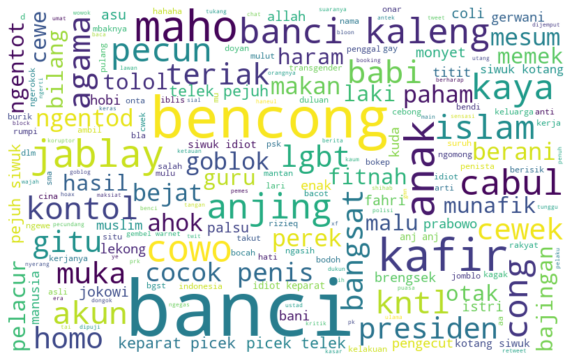

In [44]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_gender)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

### Menampilkan 10 kata teratas yang paling banyak muncul dari tweet yang menunjukkan gender cyberbullying dalam bentuk barplot

<AxesSubplot:ylabel='0'>

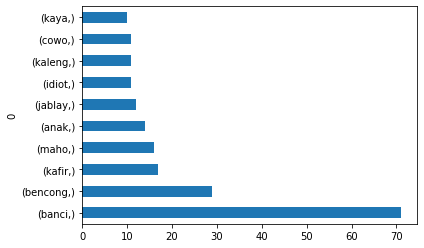

In [45]:
list_gender= []
for i in df['text_preprocessed'][df['gender']==1]:
    for j in i:
        list_gender.append(j)
list_gender = pd.DataFrame(list_gender)
list_gender.value_counts().nlargest(10).plot(kind='barh')

In [46]:
print('Berikut total dari 10 kata teratas dari gender cyberbullying')
list_gender.value_counts().nlargest(10)

Berikut total dari 10 kata teratas dari gender cyberbullying


banci      71
bencong    29
kafir      17
maho       16
anak       14
jablay     12
idiot      11
kaleng     11
cowo       11
kaya       10
dtype: int64

### <font color='orange'>4. Visualisasi Data Text Tweet Berdasarkan Kategori Physical Cyberbullying </font>

Membuat sebuah list kosong dengan mendeklarasikan kedalam bentuk string dan variabel diberi nama list_physical dan menampilkan kumpulan tweet dari kolom text_preprocessed

In [47]:
list_physical = ''
for i in df['text_preprocessed'][df['physical']==1]:
    for j in i :
        list_physical += ' '+(j)

In [48]:
list_physical

' anjing tai goblok idiot bangsat monyet babi fucc kont ngents goblok kasar maaf jokowi diktator muka ndeso hehehe cebong buta tuli kenyataan menimpa negeri membela rezim gampang didoktrin pidato data indehoi pemerintah kerjaan cornelis tionghoa stress gila neng bpk terhormat mulut ngomongmohon maaf silit cebong duit pura budek meluat kedai sombong gaji customer so muka perangai jaga nak kena ulama cebong wajah suram sarap der budek nama bule kelakuan idiot bela gabenernya malu njing bayarin sekolah masi comberan ngga bayar maju jual biji nyuk sarap budek cuman congean anjir bolot budeg hdh cakep bolot sinting picek a matamu matanya picek kebanyakkan eyeliner idiotnggak kompetensi bicara kanker baca brita nyasy aki mngkin gangguan jiwaseandai nnti amin kalahbisa malaikat bilang kafir pro asengkasian malaikatgk ngerti urusan capres bawa aki gila sebenernya seungmin idiot presiden buta tuli memimpin dg tubruktabrak budek denger rakyat teriak lengserkan jokowi cebong girang pdhl kibulin n

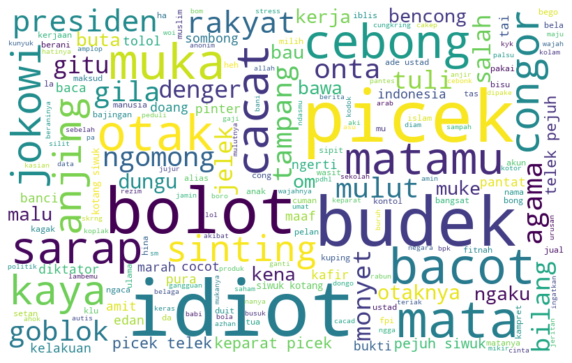

In [49]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_physical)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

### Menampilkan 10 kata teratas yang paling banyak muncul dari tweet yang menunjukkan physical cyberbullying dalam bentuk barplot

<AxesSubplot:ylabel='0'>

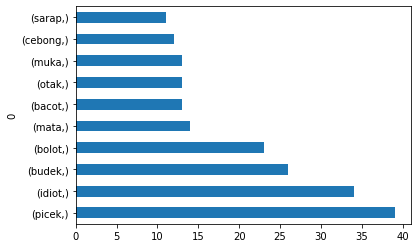

In [50]:
list_physical= []
for i in df['text_preprocessed'][df['physical']==1]:
    for j in i:
        list_physical.append(j)
list_physical = pd.DataFrame(list_physical)
list_physical.value_counts().nlargest(10).plot(kind='barh')

In [51]:
print('Berikut total dari 10 kata teratas dari physical cyberbullying')
list_physical.value_counts().nlargest(10)

Berikut total dari 10 kata teratas dari physical cyberbullying


picek     39
idiot     34
budek     26
bolot     23
mata      14
bacot     13
otak      13
muka      13
cebong    12
sarap     11
dtype: int64

### <font color='orange'>5. Visualisasi Data Text Tweet Berdasarkan Kategori Race Cyberbullying </font>

Membuat sebuah list kosong dengan mendeklarasikan kedalam bentuk string dan variabel diberi nama list_race dan menampilkan kumpulan tweet dari kolom text_preprocessed

In [52]:
list_race = ''
for i in df['text_preprocessed'][df['race']==1]:
    for j in i :
        list_race += ' '+(j)

In [53]:
list_race

' partai koalisi pendukung pemerintah menjalin kerjasama politik partai komunis china komunis rakyat cina rakyat indonesia anak keturunan pki paham linimasa panas ganyang pki situ ngerti uu kriminal anak anak menghina presiden dibawah umur thkok penjara anak cina ngancam bunuh presiden ngga apainlucu super tololwaras ngga otak usir cina ki gila pamungkas dibui garagara anti cina lha cina numpang negeri janji dhe d tepati jt lapangan kerja rakyattapi tka cina kerjaan cornelis tionghoa stress gila suu kyi antek komunisuser sindir suu kyi duterte menang nobel perdamaian menghargai pribumi minimal berlaku sopan tamumereka sejatinya perampas hak pribumi usir depak cina amerika komunisme sekulerismeliberalisme demokrasi ganti hukum allah rasulnya gus syams usir cina pki nkri janji jokowi juta lapangan kerja tka china kabinet jongos cina tangkap pelakunya polisi lengserkan jokowi rjim pki komunis pki maunya umat islam ribut senang pemerintah anti islam gaya adu domba dimainkan pdip nasdem bic

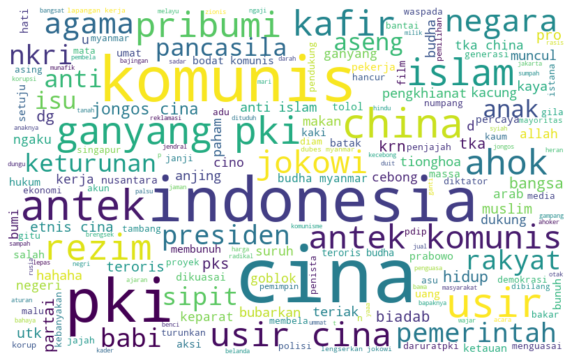

In [54]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_race)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

### Menampilkan 10 kata teratas yang paling banyak muncul dari tweet yang menunjukkan race cyberbullying dalam bentuk barplot

<AxesSubplot:ylabel='0'>

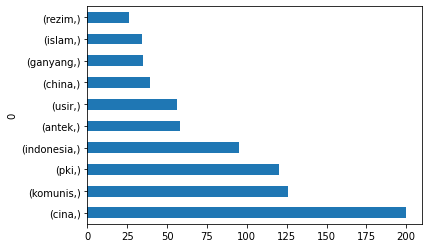

In [55]:
list_race= []
for i in df['text_preprocessed'][df['race']==1]:
    for j in i:
        list_race.append(j)
list_race = pd.DataFrame(list_race)
list_race.value_counts().nlargest(10).plot(kind='barh')

In [56]:
print('Berikut total dari 10 kata teratas dari race cyberbullying')
list_race.value_counts().nlargest(10)

Berikut total dari 10 kata teratas dari race cyberbullying


cina         200
komunis      126
pki          120
indonesia     95
antek         58
usir          56
china         39
ganyang       35
islam         34
rezim         26
dtype: int64

### <font color='orange'>6. Visualisasi Data Text Tweet Berdasarkan Kategori Religion Cyberbullying </font>

Membuat sebuah list kosong dengan mendeklarasikan kedalam bentuk string dan variabel diberi nama list_religion dan menampilkan kumpulan tweet dari kolom text_preprocessed

In [57]:
list_religion= ''
for i in df['text_preprocessed'][df['religion']==1]:
    for j in i :
        list_religion += ' '+(j)

In [58]:
list_religion

' kapir asli bisanya menang busa mulut alam nyata pecundangoh pemuja wowo mengkritik mengkritik terbiasa reaktif nama agama memilih diam pernyataannya diamnya bukti pembajak agama ulah cebong kafir keparat klu rezim berganti pulang anti islam dipercaya usir duta besarnya negara kristen putus hubungan diplomatik belajar mencatut nama tuhan kenikmatan mengikuti jln hidup muhammad bejad apbn triliyun melanggengkan solat mengaji dipangkas solat mengaji hilang bnpt bilangin kunyuk bynk omong suruh kerja calo politik ngejadiin agama tameng nte karmanya bhineka islam memperlakukan kafir dhimmi haknya diinjakinjak ayat dikaji penggallah kepala pancunglah ujung jari bro kitab suci fiksi agama wahyu pernyataan mutlak scr harfiah filosofis melanggar keyakinan umat beragama konstitusi norma agama penista agama kotor komunis pki maunya umat islam ribut senang pemerintah anti islam gaya adu domba dimainkan usir dubes myanmar negri ksh peringatan ummat budha neg menghimbau utk menghentikan penyiksaan

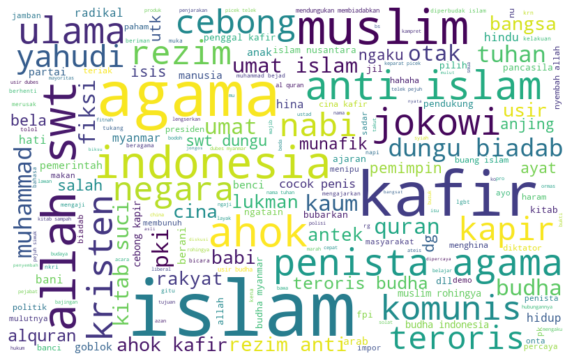

In [59]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_religion)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

### Menampilkan 10 kata teratas yang paling banyak muncul dari tweet yang menunjukkan religion cyberbullying dalam bentuk barplot

<AxesSubplot:ylabel='0'>

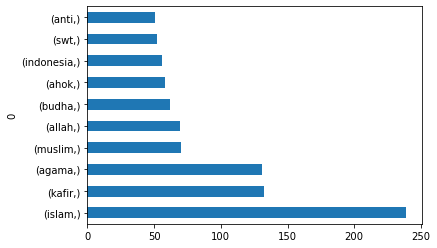

In [60]:
list_religion= []
for i in df['text_preprocessed'][df['religion']==1]:
    for j in i:
        list_religion.append(j)
list_religion = pd.DataFrame(list_religion)
list_religion.value_counts().nlargest(10).plot(kind='barh')

In [61]:
print('Berikut total dari 10 kata teratas dari religion cyberbullying')
list_religion.value_counts().nlargest(10)

Berikut total dari 10 kata teratas dari religion cyberbullying


islam        239
kafir        132
agama        131
muslim        70
allah         69
budha         62
ahok          58
indonesia     56
swt           52
anti          51
dtype: int64

## <font color='darkred'>I. Keterkaitan Hubungan Antar Kategori Cyberbullying Beserta Visualisasi Text</font>

### <font color='green'>1. Hubungan kata cyberbullying antar kategroi individual, gender, physical</font>

In [62]:
df[(df['individual']==1) & (df['gender']==1) & (df['physical']==1)]

bully                                              tweet  individual  \
2      yes  USER Anjing tai goblok idiot bangsat monyet ba...           1   
764    yes  USER              bencong idiot it kl yg ga be...           1   
1060   yes  USER heh kontol, jan sok pemes lu di rp, muka ...           1   
2367   yes   USER USER USER USER Muke lo mirip kontol monyet'           1   
3688   yes  USER emang kapan Tuhan pernah ikut pilgub sama...           1   
4282   yes  USER USER Muka lu cabul, kalo punya muka sih, ...           1   
4427   yes  USER Hauahahaha muke banci kecoa kafir z        '           1   
4855   yes                          USER muka muka pecun nih'           1   
5505   yes  USER Yang ada di otaknya tentang kesetaraan ge...           1   
6772   yes  Perjaka kq di jual...  Sok sok an mau booking....           1   
6829   yes  USER Lo tuh yg bencong, bacot lo lebih2 dari c...           1   
6923   yes  USER USER USER USER Puisi untukmu: Elu bajinga...           1   
7617   yes     Lihat noh tampang lu, tampang banci, LGBT! URL           1   
9139   yes  USER jiahahahhh si bencong idiot galau apa nge...           1   
9961   yes  USER Muka lo aja burik bangsat. Gimana mau dap...           1   

      group  gender  physical  race  religion  \
2         0       1         1     0         0   
764       0       1         1     0         0   
1060      0       1         1     0         1   
2367      0       1         1     0         0   
3688      0       1         1     0         0   
4282      0       1         1     0         0   
4427      0       1         1     0         1   
4855      0       1         1     0         0   
5505      0       1         1     0         0   
6772      0       1         1     0         0   
6829      0       1         1     0         0   
6923      0       1         1     0         0   
7617      0       1         1     0         0   
9139      0       1         1     0         0   
9961      0       1         1     0         0   

                                             text_clean  \
2     user anjing tai goblok idiot bangsat monyet ba...   
764   user              bencong idiot it kl yg ga be...   
1060  user heh kontol jan sok pemes lu di rp muka ke...   
2367    user user user user muke lo mirip kontol monyet   
3688  user emang kapan tuhan pernah ikut pilgub sama...   
4282  user user muka lu cabul kalo punya muka sih ta...   
4427           user hauahahaha muke banci kecoa kafir z   
4855                           user muka muka pecun nih   
5505  user yang ada di otaknya tentang kesetaraan ge...   
6772  perjaka kq di jual  sok sok an mau booking tan...   
6829  user lo tuh yg bencong bacot lo lebih dari cew...   
6923  user user user user puisi untukmu elu bajingan...   
7617        lihat noh tampang lu tampang banci lgbt url   
9139  user jiahahahhh si bencong idiot galau apa nge...   
9961  user muka lo aja burik bangsat gimana mau dapa...   

                                            text_clean2  \
2     anjing tai goblok idiot bangsat monyet babi fu...   
764   bencong idiot berani pk akun asli sebar hoax d...   
1060  heh kontol pemes muka memek tua monyet agama a...   
2367                           muke mirip kontol monyet   
3688  kapan tuhan pernah ikut pilgub sama lari arab ...   
4282       muka cabul punya muka banci beraninya anonim   
4427                           muke banci kecoa kafir z   
4855                                    muka muka pecun   
5505  ada otaknya kesetaraan gender telanjang mesum ...   
6772        perjaka kq jual an booking tante idiot njir   
6829  bencong bacot lebih cewe kaya banci ngamen dik...   
6923  puisi untukmu elu bajingan wajahmu setan mulut...   
7617                     noh tampang tampang banci lgbt   
9139  jiahahahhh bencong idiot galau ngeper neh keta...   
9961                           muka burik bangsat ewean   

                                      text_preprocessed  
2     [anjing, tai, goblok, idiot, bang

In [63]:
list_ingenphy = ''
for i in df['text_preprocessed'][df['individual']==1][df['gender']==1][df['physical']==1]:
    for j in i :
        list_ingenphy += ' '+(j)

In [64]:
list_ingenphy

' anjing tai goblok idiot bangsat monyet babi fucc kont ngents goblok kasar maaf bencong idiot berani pk akun asli sebar hoax fitnah skrng cb akun cong heh kontol pemes muka memek tua monyet agama agama kontol muke kontol monyet tuhan pilgub lari arab cong bencong otak idiot hina idup cong muka cabul muka banci beraninya anonim muke banci kecoa kafir z muka muka pecun otaknya kesetaraan gender telanjang mesum cacad perjaka kq jual an booking tante idiot njir bencong bacot cewe kaya banci ngamen dikasih duit bacotnya cakep jelek kaya gitu madesu mentioned quote tweet puisi untukmu elu bajingan wajahmu setan mulutmu iblis mengaku manusia binatang mesum seni nyet noh tampang tampang banci lgbt jiahahahhh bencong idiot galau ngeper neh ketauan nyebarin berita fitnah maklum bencong turunan gerwani conggak fitnah makan kerjaan mangkal emperan hihihihihihi muka burik bangsat ewean'

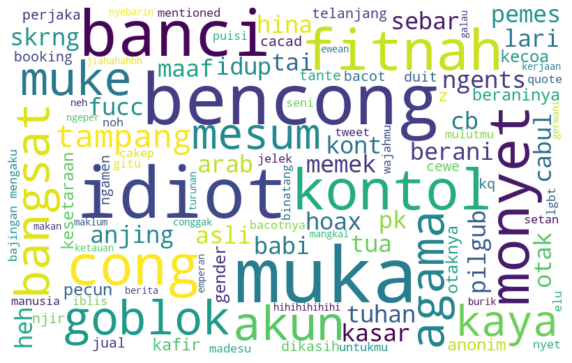

In [65]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_ingenphy)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<AxesSubplot:ylabel='0'>

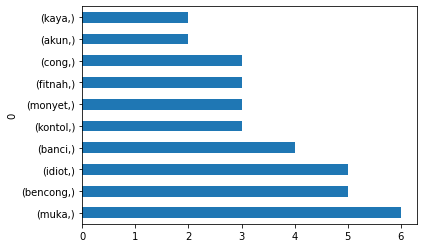

In [66]:
list_ingenphy= []
for i in df['text_preprocessed'][df['individual']==1][df['gender']==1][df['physical']==1]:
    for j in i:
        list_ingenphy.append(j)
list_ingenphy = pd.DataFrame(list_ingenphy)
list_ingenphy.value_counts().nlargest(10).plot(kind='barh')

### <font color='green'>2. Hubungan kata cyberbullying antar kategori individual, religion, physical</font>

In [67]:
df[(df['individual']==1) & (df['religion']==1) & (df['physical']==1)]

bully                                              tweet  individual  \
782    yes  USER USER USER USER USER USER Dasar muka tai b...           1   
988    yes  USER USER Woiii GOBLOG, kalo Produk Kafir Anji...           1   
1060   yes  USER heh kontol, jan sok pemes lu di rp, muka ...           1   
4427   yes  USER Hauahahaha muke banci kecoa kafir z        '           1   
6672   yes  Nama aja Islami tapi kelakuan ??? hadeuh...!! ...           1   
7893   yes       USER USER wes lemu, ireng, kafir sisan  asu'           1   

      group  gender  physical  race  religion  \
782       0       0         1     0         1   
988       0       0         1     0         1   
1060      0       1         1     0         1   
4427      0       1         1     0         1   
6672      0       0         1     0         1   
7893      0       0         1     0         1   

                                             text_clean  \
782   user user user user user user dasar muka tai b...   
988   user user woiii goblog kalo produk kafir anjin...   
1060  user heh kontol jan sok pemes lu di rp muka ke...   
4427           user hauahahaha muke banci kecoa kafir z   
6672  nama aja islami tapi kelakuan  hadeuh dan goub...   
7893          user user wes lemu ireng kafir sisan  asu   

                                            text_clean2  \
782   muka tai babi tenar agama bawa berani share me...   
988   woiii goblog produk kafir anjing macam boleh d...   
1060  heh kontol pemes muka memek tua monyet agama a...   
4427                           muke banci kecoa kafir z   
6672  nama islami kelakuan hadeuh dan goublog pula t...   
7893                               lemu ireng kafir asu   

                                      text_preprocessed  
782   [muka, tai, babi, tenar, agama, bawa, berani, ...  
988   [woiii, goblog, produk, kafir, anjing, dipake,...  
1060  [heh, kontol, pemes, muka, memek, tua, monyet,...  
4427                     [muke, banci, kecoa, kafir, z]  
6672  [nama, islami, kelakuan, hadeuh, goublog, tamp...  
7893                          [lemu, ireng, kafir, asu]

In [68]:
list_inrenphy = ''
for i in df['text_preprocessed'][(df['individual']==1) & (df['religion']==1) & (df['physical']==1)]:
    for j in i :
        list_inrenphy += ' '+(j)

In [69]:
list_inrenphy

' muka tai babi tenar agama bawa berani share medsos umat agama hina marah maaf ayo fpi buruh woiii goblog produk kafir anjing dipake muslim dipromosikan negara muslim tolol kebanyakan nelen sperma cebong muka tampang copet bacot amplas muka parutan gante heh kontol pemes muka memek tua monyet agama agama kontol muke banci kecoa kafir z nama islami kelakuan hadeuh goublog tampang menyesakkan lemu ireng kafir asu'

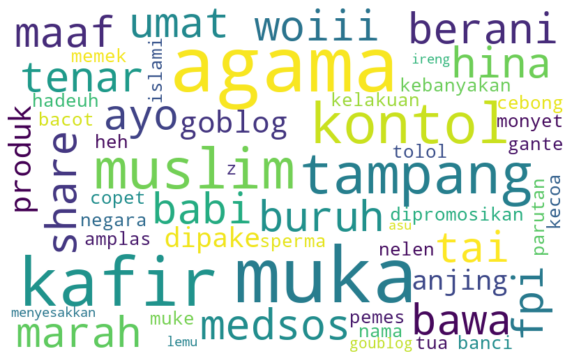

In [70]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_inrenphy)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<AxesSubplot:ylabel='0'>

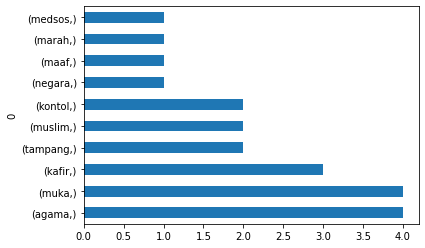

In [71]:
list_inrenphy= []
for i in df['text_preprocessed'][df['individual']==1][df['religion']==1][df['physical']==1]:
    for j in i:
        list_inrenphy.append(j)
list_inrenphy = pd.DataFrame(list_inrenphy)
list_inrenphy.value_counts().nlargest(10).plot(kind='barh')

### <font color='green'>3. Hubungan kata cyberbullying antar kategori individual, gender, religion</font>

In [72]:
df[(df['individual']==1) & (df['gender']==1) & (df['religion']==1)]

bully                                              tweet  individual  \
1060   yes  USER heh kontol, jan sok pemes lu di rp, muka ...           1   
1172   yes  RT USER: Ustad goblog nih..dia ga tau ada kafi...           1   
2808   yes  USER Elo kafir banci yakk.. ya ampun? Sdh kafi...           1   
3614   yes  Kampanye rasis ngmg nya pihak ahok yg di untun...           1   
4427   yes  USER Hauahahaha muke banci kecoa kafir z        '           1   
4750   yes  ahok kafir takut debat dengan rakyat asli prib...           1   
5524   yes  USER Hoi Gay Banci, situ Kafir ya??? Ngerti ga...           1   
7631   yes  USER Eh banci. Teriak kofar kafir!! Lo aja mas...           1   
9095   yes  RT USER: USER Ada CEBONG GENDHENG NGAMUK2 bela...           1   

      group  gender  physical  race  religion  \
1060      0       1         1     0         1   
1172      0       1         0     0         1   
2808      0       1         0     0         1   
3614      0       1         0     0         1   
4427      0       1         1     0         1   
4750      0       1         0     0         1   
5524      0       1         0     0         1   
7631      0       1         0     0         1   
9095      0       1         0     0         1   

                                             text_clean  \
1060  user heh kontol jan sok pemes lu di rp muka ke...   
1172  user ustad goblog nihdia ga tau ada kafir yg s...   
2808  user elo kafir banci yakk ya ampun sdh kafir b...   
3614  kampanye rasis ngmg nya pihak ahok yg di untun...   
4427           user hauahahaha muke banci kecoa kafir z   
4750  ahok kafir takut debat dengan rakyat asli prib...   
5524  user hoi gay banci situ kafir ya ngerti ga klo...   
7631  user eh banci teriak kofar kafir lo aja masih ...   
9095  user user ada cebong gendheng ngamuk belain si...   

                                            text_clean2  \
1060  heh kontol pemes muka memek tua monyet agama a...   
1172  ustad goblog nihdia ada kafir sunat umat yahud...   
2808  kafir banci yakk ampun kafir banci lagi jangan...   
3614  kampanye rasis ngmg pihak ahok untungkan goblo...   
4427                           muke banci kecoa kafir z   
4750  ahok kafir takut debat rakyat asli pribumi nel...   
5524  hoi gay banci situ kafir ngerti islam hijrah m...   
7631  banci teriak kofar kafir coli muncrat kemana m...   
9095  ada cebong gendheng ngamuk belain homo penista...   

                                      text_preprocessed  
1060  [heh, kontol, pemes, muka, memek, tua, monyet,...  
1172  [ustad, goblog, nihdia, kafir, sunat, umat, ya...  
2808  [kafir, banci, yakk, ampun, kafir, banci, sedi...  
3614  [kampanye, rasis, ngmg, ahok, untungkan, goblo...  
4427                     [muke, banci, kecoa, kafir, z]  
4750  [ahok, kafir, takut, debat, rakyat, asli, prib...  
5524  [hoi, gay, banci, situ, kafir, ngerti, islam, ...  
7631  [banci, teriak, kofar, kafir, coli, muncrat, k...  
9095  [cebong, gendheng, ngamuk, belain, homo, penis...

In [73]:
list_ingenre = ''
for i in df['text_preprocessed'][(df['individual']==1) & (df['gender']==1) & (df['religion']==1)]:
    for j in i :
        list_ingenre += ' '+(j)

In [74]:
list_ingenre

' heh kontol pemes muka memek tua monyet agama agama kontol ustad goblog nihdia kafir sunat umat yahudibahkan bayiga uda ngerti coli sunatmuka kafir banci yakk ampun kafir banci sedih cong google kafir banci kampanye rasis ngmg ahok untungkan goblok kafir untungkan perkosa bunuh enak berduit muke banci kecoa kafir z ahok kafir takut debat rakyat asli pribumi nelayan pakar reklamasi rakyat ahok kafir bencong hoi gay banci situ kafir ngerti islam hijrah hijab wajib saudara seiman menutupi masalalunya negatif kaum laknatullah alaih banci teriak kofar kafir coli muncrat kemana teriak mulu berisik cong mulut banci yahhhh cebong gendheng ngamuk belain homo penista agama hahaha'

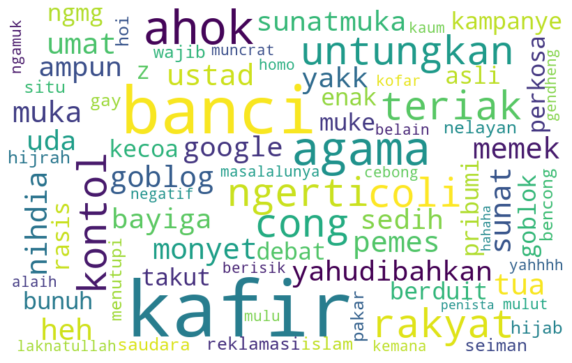

In [75]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_ingenre)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<AxesSubplot:ylabel='0'>

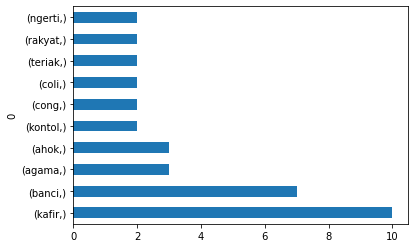

In [76]:
list_ingenre= []
for i in df['text_preprocessed'][df['individual']==1][df['gender']==1][df['religion']==1]:
    for j in i:
        list_ingenre.append(j)
list_ingenre = pd.DataFrame(list_ingenre)
list_ingenre.value_counts().nlargest(10).plot(kind='barh')

### <font color='green'>4. Hubungan kata cyberbullying antar kategori individual, religion, race</font>

In [77]:
df[(df['individual']==1) & (df['race']==1) & (df['religion']==1)]

bully                                              tweet  individual  \
472    yes  apa anaknya si napi cina kafir ini yg perlu di...           1   
698    yes  INSYAA ALLAH PENGUASA JAHAT YG JADI JONGOS & B...           1   
1718   yes  Hm menyampah pula tengok live FB Paan Khair***...           1   
2398   yes  USER USER Cina kafir ini mah...Bangsat lu!! Da...           1   
2833   yes  kebiadaban ahok cina kafir rakyat kecil yg jad...           1   
3538   yes  kebiadaban ahok cina kafir anak2 rakyat kecil ...           1   
3779   yes         USER USER Anjing komunis penista Islam!!!'           1   
3979   yes  Presiden Jongos..slalu nunggu aba" tuan Cina n...           1   
4456   yes  sekarang kita berada di rejim PKI...LENGSERKAN...           1   
5040   yes  Indonesia perlu tindakan nyata , usir Dubes My...           1   
5462   yes  USER USER Yang Nulis macam tweet kau ini biasa...           1   
5865   yes  IKLANAHOKJAHAT AHOK MENCIPTAKAN BARA API ANTAR...           1   
6284   yes  USER : Si AHOAK USER CINA ANJING KAFIR PENISTA...           1   
7054   yes  itu kan kata ahok kafir..umat islam anti ahok ...           1   
8273   yes  RT USER: Hanya antek cina yg tdk percaya komun...           1   
8338   yes  Rezim anti Islam pro komunis.. InsyaAllah kita...           1   
8519   yes  Slama owo masih hidup & masih nafsu pengen jad...           1   
8659   yes  RT USER USER trus maksudnya Indonesia yg mayor...           1   
9243   yes  Semua salah jokowi. Hanya di rezim jahat dikta...           1   

      group  gender  physical  race  religion  \
472       0       0         0     1         1   
698       0       0         0     1         1   
1718      0       0         0     1         1   
2398      0       0         0     1         1   
2833      0       0         0     1         1   
3538      0       0         0     1         1   
3779      0       0         0     1         1   
3979      0       0         0     1         1   
4456      0       0         0     1         1   
5040      0       0         0     1         1   
5462      0       0         0     1         1   
5865      0       0         0     1         1   
6284      0       0         0     1         1   
7054      0       0         0     1         1   
8273      0       0         0     1         1   
8338      0       0         0     1         1   
8519      0       0         0     1         1   
8659      0       0         0     1         1   
9243      0       0         0     1         1   

                                             text_clean  \
472   apa anaknya si napi cina kafir ini yg perlu di...   
698   insyaa allah penguasa jahat yg jadi jongos  bu...   
1718  hm menyampah pula tengok live fb paan khairdin...   
2398  user user cina kafir ini mahbangsat lu dasar k...   
2833  kebiadaban ahok cina kafir rakyat kecil yg jad...   
3538  kebiadaban ahok cina kafir anak rakyat kecil p...   
3779             user user anjing komunis penista islam   
3979  presiden jongosslalu nunggu aba tuan cina nyaa...   
4456  sekarang kita berada di rejim pkilengserkan jo...   
5040  indonesia perlu tindakan nyata  usir dubes mya...   
5462  user user yang nulis macam tweet kau ini biasa...   
5865  iklanahokjahat ahok menciptakan bara api antar...   
6284  user  si ahoak user cina anjing kafir penista ...   
7054  itu kan kata ahok kafirumat islam anti ahok ka...   
8273  user hanya antek cina yg tdk percaya komunis s...   
8338  rezim anti islam pro komunis insyaallah kita a...   
8519  slama owo masih hidup  masih nafsu pengen jadi...   
8659  user user trus maksudnya indonesia yg mayorita...   
9243  semua salah jokowi hanya di rezim jahat diktat...   

                                            text_clean2  \
472              anaknya napi cina kafir ini perlu usir   
698   insyaa allah penguasa jahat jongos budak cina ...   
1718  hm menyampah pula tengok live fb paan khairdin...   
2398                  cina kafir ini mahbangsat komunis   
2833  k

In [78]:
list_inrare = ''
for i in df['text_preprocessed'][(df['individual']==1) & (df['race']==1) & (df['religion']==1)]:
    for j in i :
        list_inrare += ' '+(j)

In [79]:
list_inrare

' anaknya napi cina kafir usir insyaa allah penguasa jahat jongos budak cina kafir komunis bernafsu jajah rampok indonesia dihancurkan allah swt hm menyampah tengok live fb paan khairdin habis pusing pasal manifesto ph takde pentingkan agama golongan dap cina kristian hey la namanya dap pas geram lepas dok motif terbesar nak jadikan sel cina kafir mahbangsat komunis kebiadaban ahok cina kafir rakyat pkl asongan digusur dianiaya teroris ahok kafir biadab kebiadaban ahok cina kafir anak rakyat pribumi islam digusur rumahnya kehidupannya anjing komunis penista islam presiden jongosslalu nunggu aba tuan cina nyaapalagi dibantai muslim cina kafir rejim pkilengserkan jokowi pemimpin tukang mengkriminalisasi ulama indonesia tindakan nyata usir dubes myanmar utk indonesia krna bikhsu budha militer membunuh masalgenosida etnis rohingnya nulis tweet kapirun manufikun baubau pki ngaku pancasila ngaku indonesiatapi mentalnya mental kachung iklanahokjahat ahok menciptakan bara api rakyat pribumi ti

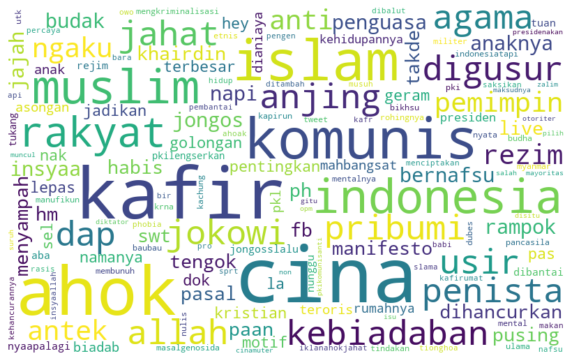

In [80]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_inrare)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<AxesSubplot:ylabel='0'>

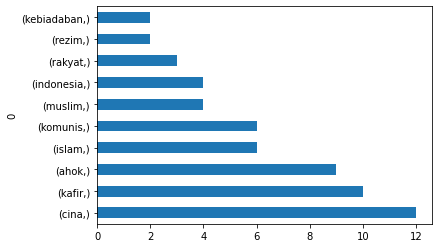

In [81]:
list_inrare= []
for i in df['text_preprocessed'][df['individual']==1][df['religion']==1][df['race']==1]:
    for j in i:
        list_inrare.append(j)
list_inrare = pd.DataFrame(list_inrare)
list_inrare.value_counts().nlargest(10).plot(kind='barh')

### <font color='green'>4. Hubungan kata cyberbullying antar kategori religion, gender, race</font>

In [82]:
df[(df['gender']==1) & (df['religion']==1) & (df['race']==1)]

bully                                              tweet  individual  \
4445   yes  Kita habis-habisan aja, bang. Usir kafir & cin...           0   

      group  gender  physical  race  religion  \
4445      1       1         0     1         1   

                                             text_clean  \
4445  kita habishabisan aja bang usir kafir  cina da...   

                                            text_clean2  \
4445  kita usir kafir cina nusantara merekalah racun...   

                                      text_preprocessed  
4445  [usir, kafir, cina, nusantara, racun, akidah, ...

In [83]:
list_genrera = ''
for i in df['text_preprocessed'][(df['gender']==1) & (df['race']==1) & (df['religion']==1)]:
    for j in i :
        list_genrera += ' '+(j)

In [84]:
list_genrera

' usir kafir cina nusantara racun akidah tukang sogok kristenisasi pelacur miras kafir anjing'

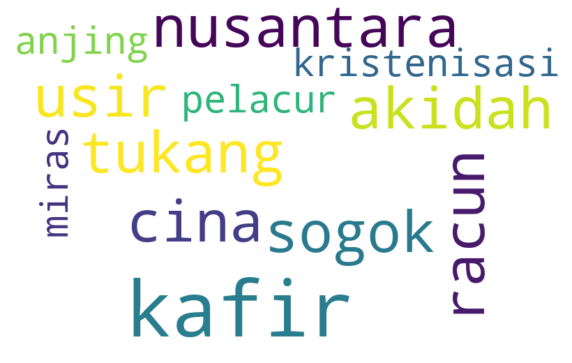

In [85]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_genrera)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<AxesSubplot:ylabel='0'>

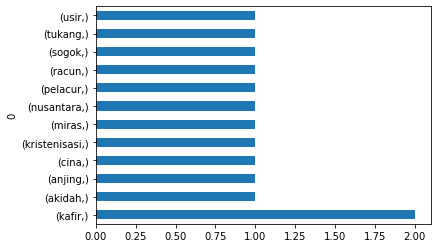

In [86]:
list_genrera= []
for i in df['text_preprocessed'][df['gender']==1][df['religion']==1][df['race']==1]:
    for j in i:
        list_genrera.append(j)
list_genrera = pd.DataFrame(list_genrera)
list_genrera.value_counts().plot(kind='barh')

### <font color='green'>5. Hubungan kata cyberbullying antar kategori group, religion, race</font>

In [87]:
df[(df['group']==1) & (df['religion']==1) & (df['race']==1)]

bully                                              tweet  individual  \
286     yes  Komunis PKI maunya umat Islam ribut terus mere...           0   
295     yes  Usir Dubes Myanmar dr Negri ini. Ksh peringata...           0   
346     yes  RT USER: USER USER USER kafir PKI nyamar jd is...           0   
433     yes  PKI now= PKS FPI HTI FUI saracen dibayar u dem...           0   
759     yes  Seandainya Jend. Suharto tidak ada di tahun 19...           0   
879     yes                     Cuman Komunis Yang Anti Agama.           0   
994     yes  Anak PKI yang pro Syiah dan antek asing juga d...           0   
999     yes  Agama selain Islam hidup enak disini cina hidu...           0   
1277    yes  Apalagi yg paling bermasalah dg PKI itu ya Ang...           0   
1280    yes  USER dosa fitnah umpama membunuh. tak taulah U...           0   
1977    yes  USER USER USER USER USER USER USER Mesir komun...           0   
2284    yes  Ada Orang tionghwa yang mengunakan izazah pals...           0   
2306    yes  Yg benci muslim biasanya antek komunis. Puluha...           0   
2598    yes  USER China Negara Komunies Anti Islam .. Sgt D...           0   
2952    yes  USER USER Melayu hidang daging lembu pada teta...           0   
3013    yes           RT USER baby kafir budha teroris myanmar           0   
3060    yes  Islam Nusantara 1 wacana soal Islam Arab denga...           0   
3183    yes  Memakai Cara Licik Membuat Akun Palsu dan Meny...           0   
3577    yes         usir budha myamar dari bumi indonesiaa URL           0   
3699    yes  Sesama budha radikal harus saling melindungi? ...           0   
3717    yes  Teroris Budha Myanmar menembaki perahu yg ditu...           0   
4073    yes  Segera koordinasikan kekuatan massa muslim..ut...           0   
4094    yes              USER USER myanmar kafir budha teroris           0   
4245    yes  WASPADA !!!!! Ada upaya ahoker, antek komunis ...           0   
4445    yes  Kita habis-habisan aja, bang. Usir kafir & cin...           0   
4529    yes   BERSIKAP KERASLAH TERHADAP MEREKA?CINA KAFIR URL           0   
4694    yes  Setuju. Musuh kita adlh teroris Budha Myanmar ...           0   
4822    yes  Umat Hindu dipermak Tentara Budha Radikal jadi...           0   
5448    yes  1 oktober hari kesaktian pancasila, tapi panca...           0   
5490    yes  Usir saja Dubes Myanmar,,, Kumpulkan orang bud...           0   
5926    yes  Oleh rezim skrg atas kendali Negara Cina Komun...           0   
6176    yes  USER Maraknya org   sipit masuk ke Indonesia h...           0   
6876    yes  Usir Budha dari Indonesia yg notabene mayorita...           0   
7228    yes  Pemerintah anti kritik Pemerintah anti Islam P...           0   
7247    yes                   USER TERORIS KAFIR BUDHA MYANMAR           0   
7313    yes  USER betul dan semua pihak yg menentang si cin...           0   
7394    yes  masih percaya aja sama cina, heran... semua pe...           0   
7578    yes         USER USER USER fuck teroris budha myanmar.           0   
7697    yes  When tumblr, tiktok, telegram are blocked by t...           0   
7762    yes  USER USER Cina babi komunis anti agama terutam...           0   
8308    yes  Acara yg mendungukan & mambiadabkan bangsa, ng...           0   
8477    yes      Biadab! Teroris Budha Myanmar bakar Al-Quran!           0   
8501    yes  USER USER biasa mereka itulah para antek antek...           0   
8888    yes  CINA KOK IKUT NGOMONG...BALIK SANA KE CINA.......           0   
9099    yes  selamat hari minggu... pki sdh tamat sdh hancu...           0   
9146    yes  I HASIL MAKMAK KALIAN JUAL PUKINYA. BAGI KSLIA...           0   
9603    yes  Kata para pki biadab agama itu candu masyaraka...           0   
9856    yes  RT USER: USER hahaha jelas2 buat pilkada dasar...           0   
10000   yes            Saya yakin mereka komunis zionis yahudi           0   
10227   yes  Memang tidak semua orang kiri (Komunis, Sosial...           0   
10324   yes     Betapa biada

In [88]:
list_grorera = ''
for i in df['text_preprocessed'][(df['group']==1) & (df['race']==1) & (df['religion']==1)]:
    for j in i :
        list_grorera += ' '+(j)

In [89]:
list_grorera

' komunis pki maunya umat islam ribut senang pemerintah anti islam gaya adu domba dimainkan usir dubes myanmar negri ksh peringatan ummat budha neg menghimbau utk menghentikan penyiksaan kpd umat islam kafir pki nyamar islam jelekin jkw kafir pki smua pki now pks fpi fui saracen dibayar u demodemo u fitnahprovokasi sara jokahokdibayar wowo ht ts isiu istana procina pkianti islam seandainya jend suharto nasib bangsa indonesia negara komunis ateis cuman komunis anti agama anak pki pro syiah antek asing diktator komunis kebijakan neoliberal wadaw agama islam hidup enak cina hidup bergelimang harta bermasalah dg pki angkatan darat dg menggerakan massa antijokowi dg isuisu antiagama komunis dosa fitnah umpama membunuh taulah sedar cina bk islam fitnah lantaklah diani konon islam niapa cerita mesir komunis kafir ekonomi dikuasai dajjal poros beijing tionghwa mengunakan izazah palsu ngaku tokoh masyarakat tionghwa sesungguhnya sampah tg pinang agama kristen wihara nama munafiq muslem benci mu

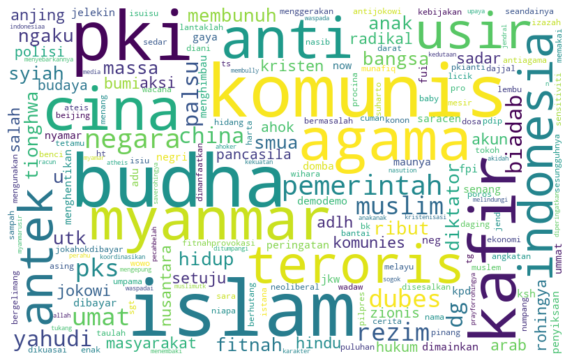

In [90]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_grorera)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<AxesSubplot:ylabel='0'>

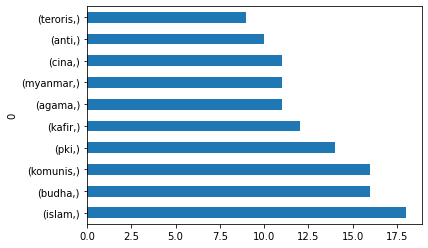

In [91]:
list_grorera= []
for i in df['text_preprocessed'][df['group']==1][df['religion']==1][df['race']==1]:
    for j in i:
        list_grorera.append(j)
list_grorera = pd.DataFrame(list_grorera)
list_grorera.value_counts().nlargest(10).plot(kind='barh')

### <font color='green'>6. Hubungan kata cyberbullying antar kategori group, religion, race</font>

In [92]:
df[(df['group']==1) & (df['gender']==1) & (df['race']==1)]

bully                                              tweet  individual  \
2076   yes  USER Yg anti cina komunis antek aseng kapitali...           0   
2463   yes  Artis kalo adalnya dr Kampung mau di gmnin jg ...           0   
4445   yes  Kita habis-habisan aja, bang. Usir kafir & cin...           0   
7933   yes  nampaknya sudah satu paket penyokong cina babi...           0   

      group  gender  physical  race  religion  \
2076      1       1         0     1         0   
2463      1       1         0     1         0   
4445      1       1         0     1         1   
7933      1       1         0     1         0   

                                             text_clean  \
2076  user yg anti cina komunis antek aseng kapitali...   
2463  artis kalo adalnya dr kampung mau di gmnin jg ...   
4445  kita habishabisan aja bang usir kafir  cina da...   
7933  nampaknya sudah satu paket penyokong cina babi...   

                                            text_clean2  \
2076  anti cina komunis antek aseng kapitalis rakus ...   
2463  artis adalnya kampung udikkampungan anak lah c...   
4445  kita usir kafir cina nusantara merekalah racun...   
7933  nampaknya satu paket penyokong cina babi pasti...   

                                      text_preprocessed  
2076  [anti, cina, komunis, antek, aseng, kapitalis,...  
2463  [artis, adalnya, kampung, udikkampungan, anak,...  
4445  [usir, kafir, cina, nusantara, racun, akidah, ...  
7933  [nampaknya, paket, penyokong, cina, babi, soko...

In [93]:
list_grogenra = ''
for i in df['text_preprocessed'][(df['group']==1) & (df['race']==1) & (df['gender']==1)]:
    for j in i :
        list_grogenra += ' '+(j)

In [94]:
list_grogenra

' anti cina komunis antek aseng kapitalis rakus zionis suaranya enak ngentod artis adalnya kampung udikkampungan anak cemplungin beli kringat halal hasil ngangkangin laki usir kafir cina nusantara racun akidah tukang sogok kristenisasi pelacur miras kafir anjing nampaknya paket penyokong cina babi sokong lgbt'

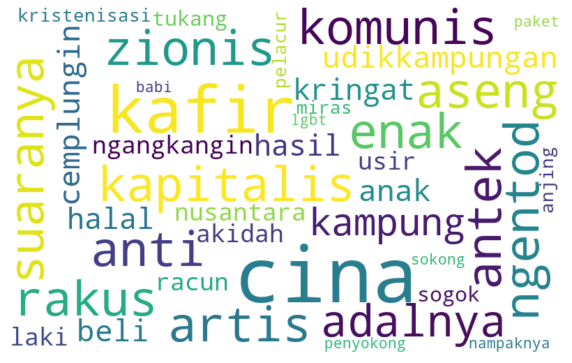

In [95]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_grogenra)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<AxesSubplot:ylabel='0'>

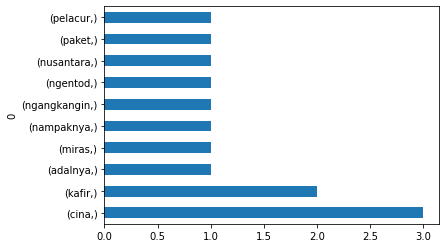

In [96]:
list_grogenra= []
for i in df['text_preprocessed'][df['group']==1][df['gender']==1][df['race']==1]:
    for j in i:
        list_grogenra.append(j)
list_grogenra = pd.DataFrame(list_grogenra)
list_grogenra.value_counts().nlargest(10).plot(kind='barh')

### <font color='green'>7. Hubungan kata cyberbullying antar kategori group, race, physical</font>

In [97]:
df[(df['group']==1) & (df['physical']==1) & (df['race']==1)]

bully                                              tweet  individual  \
83   yes  USER USER itu kerjaan cornelis, tionghoa yg st...           0   

    group  gender  physical  race  religion  \
83      1       0         1     1         0   

                                           text_clean  \
83  user user itu kerjaan cornelis tionghoa yg str...   

                              text_clean2  \
83  kerjaan cornelis tionghoa stress gila   

                              text_preprocessed  
83  [kerjaan, cornelis, tionghoa, stress, gila]

In [98]:
list_groraphy = ''
for i in df['text_preprocessed'][(df['group']==1) & (df['race']==1) & (df['physical']==1)]:
    for j in i :
        list_groraphy += ' '+(j)

In [99]:
list_groraphy

' kerjaan cornelis tionghoa stress gila'

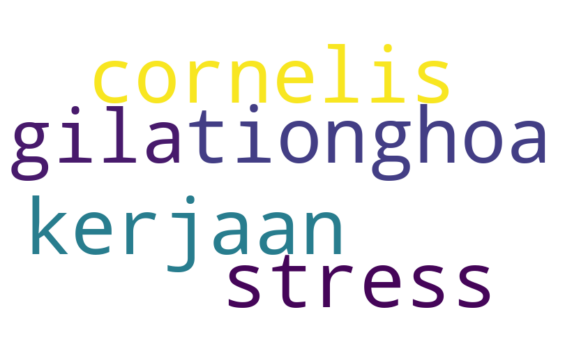

In [100]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_groraphy)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<AxesSubplot:ylabel='0'>

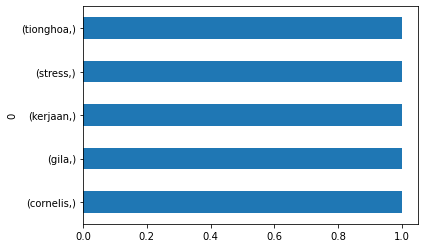

In [101]:
lis_groraphy= []
for i in df['text_preprocessed'][df['group']==1][df['physical']==1][df['race']==1]:
    for j in i:
        lis_groraphy.append(j)
lis_groraphy = pd.DataFrame(lis_groraphy)
lis_groraphy.value_counts().plot(kind='barh')

### <font color='green'>8. Hubungan kata cyberbullying antar kategori grup, gender, religion</font>

In [102]:
df[(df['group']==1) & (df['religion']==1) & (df['gender']==1)]

bully                                              tweet  individual  \
763     yes  USER KRISTUS ANJING ASU JIAMPUT KEPARAT PICEK ...           0   
1275    yes  USER Salah pangkah dpt taik..taik lgbt,liberal...           0   
2601    yes  Allah SWT benci kafir, mengajarkan cocok2 peni...           0   
2990    yes  Allah hu Barbar perintahkan penggal kafir, dib...           0   
3398    yes  Ayo Muslim hantam terus LGBT, rakyat akan paha...           0   
3929    yes  Penyesatan ini harus diluruskan, Allah SWT tid...           0   
4445    yes  Kita habis-habisan aja, bang. Usir kafir & cin...           0   
5359    yes  Anda mengajarkan ngaji ayat cocok2 penis dan p...           0   
6700    yes  USER USER USER Umat islam siapa yg ente mksd??...           0   
6802    yes  Agama Islam, Kristen, Yahudi agama SEKSIS! Mak...           0   
7435    yes  Sebelum Tentara Saudi Tiba di Suriah, ISIS BAN...           0   
7467    yes  Ajak semua Muslim cari tahu siapa Muhammad seb...           0   
7881    yes  Alquran hanya kitab sampah beraroma darah & ai...           0   
8576    yes  banyak hafalan surah Alqurannya > Termasuk aya...           0   
10229   yes  USER Koar-koar nya gerakan umat..eh ngebacotny...           0   
10465   yes                 USER USER Kristen lesbi emang ya?'           0   

       group  gender  physical  race  religion  \
763        1       1         1     0         1   
1275       1       1         0     0         1   
2601       1       1         0     0         1   
2990       1       1         0     0         1   
3398       1       1         0     0         1   
3929       1       1         0     0         1   
4445       1       1         0     1         1   
5359       1       1         0     0         1   
6700       1       1         0     0         1   
6802       1       1         0     0         1   
7435       1       1         0     0         1   
7467       1       1         0     0         1   
7881       1       1         0     0         1   
8576       1       1         0     0         1   
10229      1       1         0     0         1   
10465      1       1         0     0         1   

                                              text_clean  \
763    user kristus anjing asu jiamput keparat picek ...   
1275   user salah pangkah dpt taiktaik lgbtliberalmen...   
2601   allah swt benci kafir mengajarkan cocok penis ...   
2990   allah hu barbar perintahkan penggal kafir dibe...   
3398   ayo muslim hantam terus lgbt rakyat akan paham...   
3929   penyesatan ini harus diluruskan allah swt tida...   
4445   kita habishabisan aja bang usir kafir  cina da...   
5359   anda mengajarkan ngaji ayat cocok penis dan pe...   
6700   user user user umat islam siapa yg ente mksd f...   
6802   agama islam kristen yahudi agama seksis makany...   
7435   sebelum tentara saudi tiba di suriah isis banc...   
7467   ajak semua muslim cari tahu siapa muhammad seb...   
7881   alquran hanya kitab sampah beraroma darah  air...   
8576   banyak hafalan surah alqurannya  termasuk ayat...   
10229  user koarkoar nya gerakan umateh ngebacotnya d...   
10465                   user user kristen lesbi emang ya   

                                             text_clean2  \
763    kristus anjing asu jiamput keparat picek telek...   
1275   salah pangkah taiktaik lgbtliberalmenentang ra...   
2601   allah swt benci kafir mengajarkan cocok penis ...   
2990   allah hu barbar perintahkan penggal kafir dibe...   
3398   ayo muslim hantam lgbt rakyat akan paham dibua...   
3929   penyesatan ini diluruskan allah swt ngajar ban...   
4445   kita usir kafir cina nusantara merekalah racun...   
5359   anda mengajarkan ngaji ayat cocok penis dan pe...   
6700   umat islam siapa mksd fpi muslim penista islam...   
6802   agama islam kristen yahudi agama seksis makany...   
7435   sebelum tentara saudi tiba suriah isis banci l...   
7467   muslim tahu siapa muhammad sebenarnya jangan s...   
7881   alquran hanya kitab 

In [103]:
list_grogenre = ''
for i in df['text_preprocessed'][(df['group']==1) & (df['religion']==1) & (df['gender']==1)]:
    for j in i :
        list_grogenre += ' '+(j)

In [104]:
list_grogenre

' kristus anjing asu jiamput keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk k salah pangkah taiktaik lgbtliberalmenentang raja pengampu kafir harbi allah swt benci kafir mengajarkan cocok penis istri gemar mengazab menjanjikan rampasan allah hu barbar perintahkan penggal kafir dibenarkan fahri allah hu barbar ngajarkan cocok penis ayo muslim hantam lgbt rakyat paham dibuang islam parmusi dorong ruu anti paham lgbt penyesatan diluruskan allah swt ngajar bangun keluarga cocok penis usir kafir cina nusantara racun akidah tukang sogok kristenisasi pelacur miras kafir anjing mengajarkan ngaji ayat cocok penis penggal kafir pahala membiadabkan umat islam mksd fpi muslim penista islam bajingan muslim mgkn berbuat onar pengecut lari tgg jwb mesum islam islam giliran mesum islam berbuat onar islam agama islam

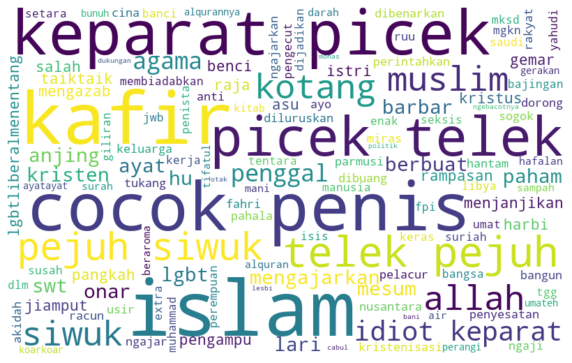

In [105]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_grogenre)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<AxesSubplot:ylabel='0'>

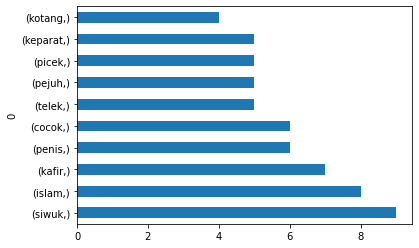

In [106]:
list_grogenre= []
for i in df['text_preprocessed'][df['group']==1][df['gender']==1][df['religion']==1]:
    for j in i:
        list_grogenre.append(j)
list_grogenre = pd.DataFrame(list_grogenre)
list_grogenre.value_counts().nlargest(10).plot(kind='barh')

### <font color='green'>9. Hubungan kata cyberbullying antar kategori physical, gender, religion</font>

In [107]:
list_phygenre = ''
for i in df['text_preprocessed'][(df['gender']==1) & (df['religion']==1) & (df['physical']==1)]:
    for j in i :
        list_phygenre += ' '+(j)

In [108]:
list_phygenre

' kristus anjing asu jiamput keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk kotang siwuk idiot keparat picek telek pejuh siwuk k heh kontol pemes muka memek tua monyet agama agama kontol muke banci kecoa kafir z'

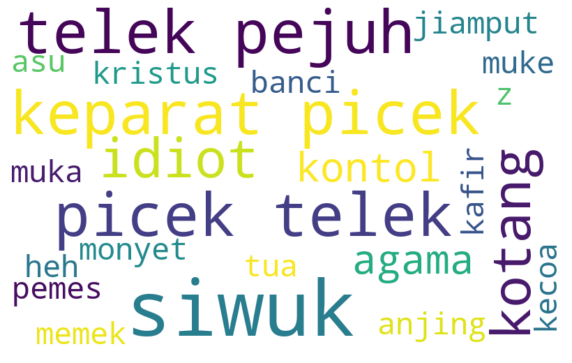

In [109]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_phygenre)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<AxesSubplot:ylabel='0'>

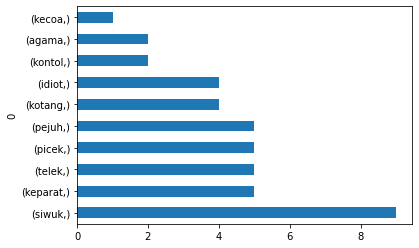

In [110]:
list_phygenre= []
for i in df['text_preprocessed'][df['physical']==1][df['gender']==1][df['religion']==1]:
    for j in i:
        list_phygenre.append(j)
list_phygenre = pd.DataFrame(list_phygenre)
list_phygenre.value_counts().nlargest(10).plot(kind='barh')

## <font color='darkred'>J. Hasil dan Analisis</font>

### <font color='purple'>1. Banyaknya kasus cyberbullying terkait kata JOKOWI</font>

<AxesSubplot:ylabel='0'>

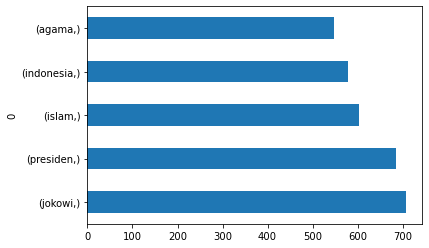

In [111]:
# DIAGRAM 5 TERATAS DARI SELURUH TWEET KATEGORI CYBERBULLYING
list_all.value_counts().nlargest(5).plot(kind='barh')

<AxesSubplot:ylabel='0'>

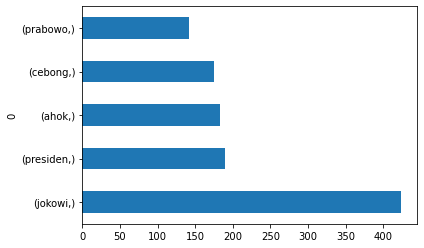

In [112]:
# DIAGRAM BERDASARKAN TWEET KATEGORI INDIVIDUAL CYBERBULLYING
list_individual.value_counts().nlargest(5).plot(kind='barh')

Dilihat pada 2 diagram diatas bahwa kata JOKOWI menjadi kata nomor satu yang paling banyak disebut dan dibully di twitter. Memang pada kenyataannya hal tersebut menjadi trending topik yang banyak dibicarakan pada saat ini, seperti yang terdapat pada website-website berita berikut yang sedang membicarakan hal tersebut:
* https://news.detik.com/berita/d-2223828/-jokowi-sering-di-bully-di-twitter
* https://nasional.okezone.com/read/2014/10/30/337/1058714/kasus-bullying-jokowi-jadi-trending-topic-nomor-1

### <font color='purple'>2. Ramainya kata CEBONG yang disebut di tweet yang merujuk dalam kategori group cyberbullying</font>

<AxesSubplot:ylabel='0'>

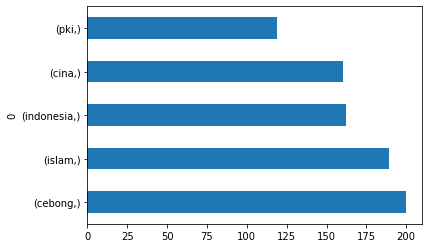

In [113]:
# DIAGRAM BERDASARKAN TWEET KATEGORI GROUP CYBERBULLYING
list_group.value_counts().nlargest(5).plot(kind='barh')

Asal mula kata cebong atau cebonger adalah sebuah julukan terhadap para pendukung Presiden Joko Widodo. Sebutan tersebut populer pada Pemilihan umum Presiden Indonesia 2014 dan Pemilihan umum Presiden Indonesia 2019. Yang kemudian masyarakat terbiasa memakai atau menggunakan kata tersebut dengan sembarang untuk mengatakan sekumpulan kelompok atau grup yang tidak mereka sukai atau mereka benci. Kata cebong tersebut juga sudah banyak sekali dibicarakan seperti yang dilansir pada website-website berikut :
* https://geotimes.id/opini/hentikan-sebutan-cebong-dan-kampret/
* https://mediaindonesia.com/politik-dan-hukum/363515/masyarakat-diminta-tak-pakai-lagi-kata-cebong-kampret-kadrun
* https://www.indonesiatravel.news/politik/la-nyalla-jangan-lagi-ada-kata-idiot-kampret-dan-cebong/
* https://www.radioidola.com/2018/menyoroti-perang-kata-cebong-dan-kampret-sinisme-dua-kubu-tapi-nirgagasan/
* https://dafunda.com/tekno/sosial-media-diramaikan-soal-cebong-kampret/
* https://inet.detik.com/cyberlife/d-4105892/ramai-ramai-soal-cebong-kampret-di-medsos

### <font color='purple'>3. Dikatain atau diteriakin dengan sebutan BANCI ATAU BENCONG?</font>

<AxesSubplot:ylabel='0'>

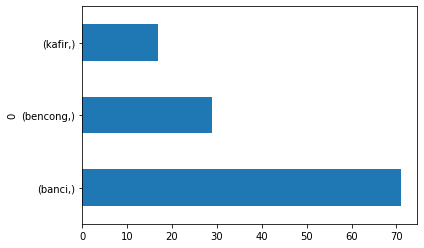

In [114]:
# DIAGRAM BERDASARKAN TWEET KATEGORI GENDER CYBERRBULLYING
list_gender.value_counts().nlargest(3).plot(kind='barh')

Membahas kategori gender cyberbullying bukanlah hal yang asing untuk didengar. Hal tersebut sudah sering kita dengar dilingkungan-lingkungan toxic sekitar, tidak hanya didunia maya saja. Pada jenis gender bullying yang sering digunakan orang atau netizen yakni kata BANCI atau BENCONG. Kehidupan seseorang berbeda-beda, kita tidak bisa memilih seperti apa kita dilahirkan, dan tidak seharusnya kita sembarangan mengatakan seseorang dengan sebutan toxic tersebut. Tidak hanya didunia maya seperti sosial media khususnya twitter pada kasus ini, melainkan juga didunia nyata banyak sekali kasus seperti yang dicantumkan pada website-website berikut :
* https://www.indozone.id/news/EnsMYZW/mulai-diteriaki-banci-hingga-ditelanjangi-ini-sederet-aksi-bully-yang-dialami-pegawai-kpi
* https://internasional.kompas.com/read/2017/06/16/12252491/dituduh.banci.remaja.18.tahun.disiksa.kawan-kawannya.hingga.tewas
* https://www.voa-islam.com/read/smart-teen/2016/02/23/42431/hentikan-bullying-untuk-mencegah-teman-jadi-banci-dan-gay/

### <font color='purple'>4. Body shaming berpengaruh ke psikis seseorang</font>

<AxesSubplot:ylabel='0'>

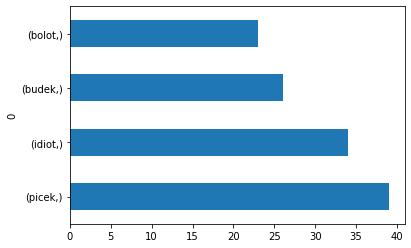

In [115]:
# DIAGRAM BERDASARKAN TWEET KATEGORI PHYSICAL CYBERBULLYING
list_physical.value_counts().nlargest(4).plot(kind='barh')

Kembali seperti kasus sebelumnya mengenai gender cyberbullying, pada kasus berikut tentang physical cyberbullying yang kurang lebih tidak jauh berbeda yakni kasus body shaming. Pada tweet yang muncul mengenai physical bullying menunjukkan kata paling banyak muncul yaitu picek, idiot, budek dan bolot. Semua kata tersebut merupakan kata yang merujuk pada fisik seseorang. Orang yang mengatakan kata-kata tersebut seharusnya mempunyai pertanyaan ke masing-masing diri individu sebelum mereka mengatakan ejekan kepada orang yang ingin mereka katakan dengan bertanya dalam diri sendiri "Bagaimana jika aku seperti dia?", hal tersebut sangat penting untuk diingat agar lebih jauh kedepan orang-orang yang dengan terbiasa mengejek lebih mengintropeksi diri apakah dirinya sudah lebih baik atau tidak. Kasus tersebut sama seperti halnya seperti kasus-kasus didunia nyata yang ada pada website-website yang dibawah ini :
* https://news.detik.com/berita/d-4321990/polisi-tangani-966-kasus-body-shaming-selama-2018
* https://wartakota.tribunnews.com/2018/11/29/tahun-ini-ada-966-kasus-body-shaming-di-indonesia-374-perkara-sudah-diselesaikan-polisi
* https://repositori.usu.ac.id/handle/123456789/45501
* https://www.indosport.com/angkat-berat---besi/20210807/viral-kasus-body-shaming-pasca-olimpiade-nurul-akmal-buka-suara

### <font color='purple'>5. Rasisme yang menyebar layaknya virus</font>

<AxesSubplot:ylabel='0'>

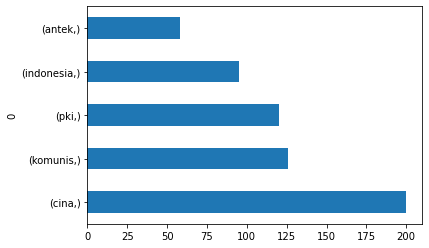

In [116]:
# DIAGRAM BERDASARKAN TWEET KATEGORI RACE CYBERBULLYING
list_race.value_counts().nlargest(5).plot(kind='barh')

<AxesSubplot:ylabel='0'>

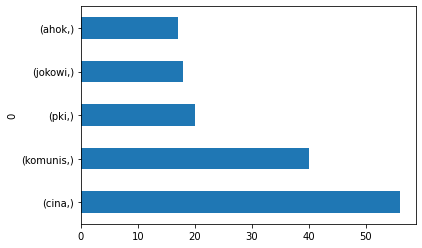

In [117]:
# HUBUNGAN KETERKAITAN CYBERBULLYING YANG MENYEBUTKAN JOKOWI DENGAN RASISME YANG MENGATAKAN ANTEK CINA/KOMUNIS/PKI
lis_groraphy= []
for i in df['text_preprocessed'][df['individual']==1][df['race']==1]:
    for j in i:
        lis_groraphy.append(j)
lis_groraphy = pd.DataFrame(lis_groraphy)
lis_groraphy.value_counts().nlargest(5).plot(kind='barh')

In [118]:
# BANYAK KATA YANG MENUNJUKKAN CYBERBULLYING TERHADAP JOKOWI DENGAN ETNIS
cyberbullying_jokowi = ''
for i in df['text_preprocessed'][(df['individual']==1) & (df['race']==1)]:
    for j in i :
        cyberbullying_jokowi += ' '+(j)
cyberbullying_jokowi

' komunis situ ngerti uu kriminal anak anak menghina presiden dibawah umur thkok penjara anak cina ngancam bunuh presiden ngga apainlucu super tololwaras ngga otak usir cina ki gila pamungkas dibui garagara anti cina lha cina numpang negeri janji dhe d tepati jt lapangan kerja rakyattapi tka cina suu kyi antek komunisuser sindir suu kyi duterte menang nobel perdamaian janji jokowi juta lapangan kerja tka china tangkap pelakunya polisi lengserkan jokowi rjim pki komunis sederhana memaksakan kehendak byk aturan contoh memaksa emoney komunis rezim komunis pki soeharto menyingkirkan soekarno ditiru prabowo krn menantu menteri perdagangan cinasdh numpang makan hidup indonesia perkara pribumi usir nkri anaknya napi cina kafir usir bodat komunis tolol rezim diktaktor ekonomi utk cina sumpah setia uud pengkhianat turunkan jokowi insyaa allah penguasa jahat jongos budak cina kafir komunis bernafsu jajah rampok indonesia dihancurkan allah swt antek komunis biadab jongos cina wadaauuuwwww kalem w

Rasis mengacu pada sikap rasisme dalam masyarakat. Rasisme lahir dari sifat manusia sebagai makhluk sosial yang terkadang memandang hubungannya dengan manusia lain dibatasi oleh sekat-sekat perbedaan secara fisik. Pada kasus ini terkait tweet yang menunjukkan rasis dengan kata yang paling banyak muncul yakni kata CINA, KOMUNIS, dan PKI. Dimana ketiga kata tersebut juga saling berhubungan dengan tweet jenis individual group, yang ditemukan juga kata JOKOWI. Data disebutkan valid, karena banyak isu fakta dengan perbincangan presiden Joko Widodo dengan kaitan antek-Cina, PKI, ataupun KOMUNIS yang banyak disebutkan oleh masyarakat seperti yang terdapat pada website-website berikut mengenai isu presiden Joko Widodo.
* https://nasional.sindonews.com/berita/1209337/13/istana-hentikan-isu-anti-islam-antek-china-pro-pki
* https://republika.co.id/berita/phz7w5320/di-bandung-jokowi-luruskan-isu-pki-hingga-antek-cina
* https://www.eramuslim.com/berita/nasional/teten-pemerintah-dituding-antek-cina-anti-islam-dan-pro-pki.htm
* https://www.harianindonesia.id/berita-utama/presiden-tuduhan-antek-pki-itu-fitnah.html
* https://www.kaskus.co.id/thread/53c609efc3cb17042d8b4649/jokowi-bpknya-pki-antek-yahudi-org-cina/
* https://beritaenam.com/sebut-maruf-amin-pengikut-pki-dan-antek-cina-kh-saadullah-basuni-dilapor-polisi/
* https://www.kompasiana.com/komentar/agungwebe/5c58a582ab12ae5e194207c2/pa-jokowi-itu-antek-cina-dan-pki-ya
* https://seword.com/urusan-hati/surat-cinta-untuk-presiden-joko-widodo/

### <font color='purple'>6. Rasisme yang menyebar layaknya virus</font>

<AxesSubplot:ylabel='0'>

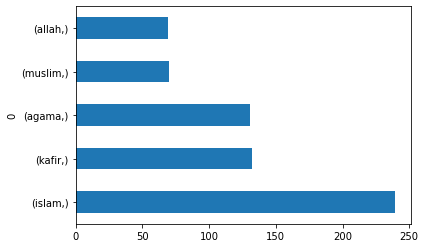

In [119]:
# DIAGRAM BERDASARKAN TWEET KATEGORI RELIGION CYBERBULLYING
list_religion.value_counts().nlargest(5).plot(kind='barh')

Membahas kasus tentang religion cyberbullying bukan hal sepele melainkan sangat serius, karena mengejek agama bukan lagi berhadapan dengan manusia saja melainkan juga dengan Tuhan YME. Ditambah lagi banyak sekali kata ISLAM yang muncul pada kasus jenis religion bullying ini seperti yang terdapat pada website-website berikut.
* https://www.kaskus.co.id/thread/51dd09df4f6ea1453b000007/jangan-ngejek-islam-donk/
* https://www.kaskus.co.id/show_post/51dd0f064f6ea17f65000000/6/-
* https://indonesia.faithfreedom.org/forum/viewtopic.php?t=13267
* https://news.beritaislam.org/2020/10/soal-penghinaan-nabi-denny-siregar.html
* https://www.dutaislam.com/2018/07/kurangajar-ke-nu-banyak-suka-ngejek-tapi-diajak-ketemu-ciut-tak-mau.html
* https://www.voa-islam.com/read/politik-indonesia/2019/11/07/68250/kata-menag-radikal-itu-menjelekjelekan-agama-lain-dan-mengkafirkafirkan/

## <font color='darkred'>K. Kesimpulan</font>

Berdasarkan hasil analisis, dapat disimpulkan bahwa cyberbullying adalah bentuk tindakan atau perilaku negatif, agresif seperti mengganggu, menyakiti atau melecehkan yang dilakukan secara sadar, sengaja dengan cara berulang-ulang oleh seseorang atau sekelompok orang untuk menyebabkan ketidaksenangan atau menyakiti orang lain secara berulang kali. Meskipun ucapan ataupun tindakan tersebut tidak secara langsung dikatakan akan tetapi akan tetap berpengaruh bagi kesehatan mental seseorang dari perilaku negatif yang kini sedang popular dikalangan masyarakat ini adalah ketidaknyamanan orang lain atau korban cyberbullying.
Solusi yang tepat untuk menangani guna mencegah cyberbullying terus terjadi yaitu dengan membiasakan diri berkomukasi positif dalam media sosial, serta pandai-pandai dalam menyaring informasi yang didapat sebelum menyebarluaskan (sharing) informasi. Hal yang terpenting juga jangan mengikuti teman atau orang sekitar yang melakukan tindak cyberbullying hanya demi mengikuti sebuah trend. 